<a href="https://colab.research.google.com/github/adnaksbhat/Colab_JupyterNotebooks/blob/main/ecr_all_closed_2020_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECR_All_Closed_2020_2024

##data

In [ ]:
import pandas as pd

df_og = pd.read_excel("/content/ECR_All_Closed_2020_2024.xlsx")


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

FileNotFoundError: [Errno 2] No such file or directory: '/content/ECR_All_Closed_2020_2024.xlsx'

In [ ]:
df_og.head(2)

NameError: name 'df_og' is not defined

In [ ]:
df = df_og[['ECR_CODE', 'SOURCE OF CHANGE', 'ECR_CREATION_DATE', 'REASON_DESC', 'CHANGE_TYPE','COSTING_PROJECTS','MATERIAL_CATEGORY','CHANGE_CATEGORY','CHANGE DESCRIPTION','IMPACTEDITEM', 'IMPACTED ITEM DESCRIPTION','FUNCTION','DIVISION','ORGANIZATION NAME','AGING','SUB_PL']]
df.head()

NameError: name 'df_og' is not defined

In [ ]:
df_FFF= df[(df['CHANGE_TYPE'] == 'FFF&P ONLY')]
df_CIS_FFF = df[(df['CHANGE_TYPE'] == 'CIS/CIS+FFF&P')]

In [ ]:
df_FFF.head(2)

In [ ]:
df_CIS_FFF.head(2)

##graphs

In [ ]:
# FUNCTION

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('FUNCTION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Function vs Count")
plt.xlabel("Count")
plt.ylabel("Function")

In [ ]:
# SOURCE OF CHANGE

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('SOURCE OF CHANGE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Source of Change vs Count")
plt.xlabel("Count")
plt.ylabel("Source of Change")

##ECR_CODE
Each ECR_CODE has multiple COSTING_PROJECTS


So, ECR_CODE is grouped along with COSTING_PROJECTS(Job No.)


Now ECR_CODE can be used as PK



In [ ]:
def group_cols(df, colA, colB):
    grouped_df = df.groupby(colA)[colB].agg(list).reset_index()
    grouped_df.rename(columns={colB: colB + '_new_col'}, inplace=True)
    df = pd.merge(df, grouped_df, on=colA, how='left')
    df.drop(colB, axis=1, inplace=True)
    return df

In [ ]:
df=group_cols(df,'ECR_CODE','COSTING_PROJECTS')

In [ ]:
# change type to string
# remove brackets
# drop duplicate so that ECR_CODE can act as PK
df['COSTING_PROJECTS_new_col']=df['COSTING_PROJECTS_new_col'].astype(str)
df['COSTING_PROJECTS_new_col'] = df['COSTING_PROJECTS_new_col'].str.replace(r'[\[\]\']', '', regex=True)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head(50)

In [ ]:
df.shape

In [ ]:
# Function to sort each cell
def sort_costing_projects(cell):
    # Ensure the cell is a string before processing
    if isinstance(cell, list):
        cell = ', '.join(cell)  # Convert list to string
    # Split, strip whitespace, sort, and rejoin
    sorted_items = sorted(item.strip() for item in cell.split(','))
    return ', '.join(sorted_items)


In [ ]:
# Apply the function to each cell in the specified column
df['COSTING_PROJECTS_new_col'] = df['COSTING_PROJECTS_new_col'].apply(sort_costing_projects)



In [ ]:
df.head()

In [ ]:
# Top 10 most mentioned string in df[COSTING_PROJECTS_new_col]

from collections import Counter

def top_mentioned_strings(df, column, top_n):

    all_strings = []
    for value in df[column]:
        if isinstance(value, str):  # Check if the value is a string
            strings = value.split(',')
            all_strings.extend(strings)
    string_counts = Counter(all_strings)
    top_strings = string_counts.most_common(top_n)
    return top_strings



In [ ]:

top_10_strings = top_mentioned_strings(df, 'COSTING_PROJECTS_new_col', 10)
top_10_strings

NameError: name 'df' is not defined

In [ ]:
# prompt: plot above top_10_strings

import matplotlib.pyplot as plt

# Assuming top_10_strings is a list of tuples (string, count)
strings, counts = zip(*top_10_strings)

plt.figure(figsize=(10, 6))
plt.bar(strings, counts,color='pink')
plt.xlabel("COSTING_PROJECTS")
plt.ylabel("Count")
plt.title("Top 10 Most Mentioned COSTING_PROJECTS")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##modified df  |  made costing_projects as pk and has been grouped togather

In [ ]:
# prompt: if  df[COSTING_PROJECTS_new_col] value is same then merge those rows

def merge_rows_with_same_costing_projects(df):
    # Group by 'COSTING_PROJECTS_new_col' and aggregate other columns
    grouped = df.groupby('COSTING_PROJECTS_new_col').agg({
        'ECR_CODE': lambda x: ','.join(x.astype(str)),  # Combine ECR codes
        'CHANGE DESCRIPTION': lambda x: ','.join(x.astype(str)),
        'IMPACTEDITEM': lambda x: ','.join(x.astype(str)), #Combine IMPACTEDITEM values


    }).reset_index()

    return grouped

df_merged = merge_rows_with_same_costing_projects(df)
df_merged

In [ ]:
df_merged.shape

In [ ]:
df['ECR_CODE'].value_counts()

In [ ]:
# ECR-550831	has 2 values coz IMPACTED ITEM DESCRIPTION	is differently described

In [ ]:
'''

Method to find all rows which has more than 2 values in a col


'''

In [ ]:
# Method to find all rows which has more than 2 values in a col. example [1908315, 1703775]

def find_rows_with_multiple_values(df, colA, value):

    result_df = df[df[colA].str.split(',').str.len() > value]

    return result_df

In [ ]:
df_multiple_costingprojects=find_rows_with_multiple_values(df,'COSTING_PROJECTS_new_col',1)

In [ ]:
df_multiple_costingprojects.head()

In [ ]:
#grouping costing_projects to ECR_code



##SOURCE OF CHANGE

has 5 unique values.

So, label encode these

In [ ]:
df.head(2)

In [ ]:
# prompt: plot graph on df['SOURCE OF CHANGE']

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['SOURCE OF CHANGE'].value_counts().plot(kind='barh')
plt.ylabel('Source of Change')
plt.xlabel('Count')
plt.title('Distribution of Source of Change')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
df['SOURCE OF CHANGE'].unique()

##REASON_DESC

has unique values

So, label encode these

In [ ]:
df['REASON_DESC'].value_counts()

NameError: name 'df' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['REASON_DESC'].value_counts().plot(kind='barh')
plt.ylabel('REASON_DESC')
plt.xlabel('Count')
plt.title('Distribution of REASON_DESC')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
# prompt: group REASON_DESC and MATERIAL_CATEGORY and find top 10 MATERIAL_CATEGORY for each REASON_DESC

# Group by 'REASON_DESC' and 'MATERIAL_CATEGORY', then get the top 10 'MATERIAL_CATEGORY' for each 'REASON_DESC'
top_10_materials_for_reason = df.groupby('REASON_DESC')['MATERIAL_CATEGORY'].value_counts().groupby(level=0).head(5)

top_10_materials_for_reason

In [ ]:


import matplotlib.pyplot as plt

# Assuming top_10_materials_for_reason is already defined as in your provided code
# Iterate through each unique REASON_DESC
for reason in top_10_materials_for_reason.index.get_level_values(0).unique():
    # Get the top 10 materials for the current reason
    reason_data = top_10_materials_for_reason[reason]
    # Create the pie chart
    plt.figure(figsize=(18, 16))  # Adjust figure size as needed
    plt.pie(reason_data, autopct='%1.1f%%', startangle=90, explode=[0.05] * len(reason_data)) #Added autopct for percentage values
    plt.title(f'Reason: {reason}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(reason_data.index, loc='upper left', bbox_to_anchor=(1, 1)) #legend only
    plt.show()

In [ ]:
df['REASON_DESC'].unique()

##CHANGE_CATEGORY

eventhough it has unique values, its in mixtured form
apply multilabel binarizer

here u can ignore 'DOCUMENT' col as they cause no major impacts

In [ ]:
df['CHANGE_CATEGORY'].unique()

In [ ]:
#seperate if df['CHANGE_CATEGORY']=='DOCUMENT'

In [ ]:
df_document=df[df['CHANGE_CATEGORY']=='DOCUMENT']






df=df[df['CHANGE_CATEGORY']!='DOCUMENT']

In [ ]:
df_document.head()     #will have only documents

In [ ]:
df.head()

In [ ]:
df['CHANGE_CATEGORY']=df['CHANGE_CATEGORY'].astype(str)

In [ ]:
from collections import Counter

def count_change_category_words(text):
    words = text.lower().split(',')
    return Counter(words)

change_category_word_counts = df['CHANGE_CATEGORY'].apply(count_change_category_words)

# Combine word counts from all rows
total_change_category_word_counts = Counter()
for counts in change_category_word_counts:
    total_change_category_word_counts.update(counts)

total_change_category_word_counts

In [ ]:
def search_change_category(word):
  word = word.lower()

  return total_change_category_word_counts[word]

In [ ]:
search_change_category("move component")

In [ ]:
def find_word_in_change_category(word, change_type):
  word = word.lower()


  matching_rows = df[(df['CHANGE_CATEGORY'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','MATERIAL_CATEGORY']]
  else:
    return None

In [ ]:
find_word_in_change_category("move component", "FFF&P ONLY")

##MATERIAL_CATEGORY

has unique values

So, label encode these

In [ ]:
# prompt: for each of df[COSTING_PROJECTS] find top MATERIAL_CATEGORY value

def get_top_material_category(df):


    # Group by 'COSTING_PROJECTS' and get the mode of 'MATERIAL_CATEGORY'
    top_material_categories = df.groupby('COSTING_PROJECTS_new_col')['MATERIAL_CATEGORY'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown').reset_index()
    return top_material_categories


# Example usage (assuming your DataFrame is named 'df'):
top_categories_df = get_top_material_category(df)

top_categories_df

In [ ]:
# prompt: plot pie graph for top 10 MATERIAL_CATEGORY for above top_categories_d

import matplotlib.pyplot as plt

# Assuming 'top_categories_df' is already defined as in your provided code.
top_10_materials = top_categories_df['MATERIAL_CATEGORY'].value_counts().nlargest(5)

plt.figure(figsize=(10, 10))
plt.pie(top_10_materials, labels=top_10_materials.index, autopct='%1.1f%%', startangle=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Top 5 material categories")
plt.show()

In [ ]:
# prompt: top 5 MATERIAL_CATEGORY values

# Assuming df is your DataFrame as defined in the provided code.
top_5_materials = df['MATERIAL_CATEGORY'].value_counts().nlargest(5)
top_5_materials

In [ ]:
# prompt: plot graph for top_5_materials

import matplotlib.pyplot as plt

# Assuming top_5_materials is already defined as in your provided code.
plt.figure(figsize=(8, 6))
top_5_materials.plot(kind='bar', color='skyblue')
plt.title('Top 5 Material Categories')
plt.xlabel('Material Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['MATERIAL_CATEGORY'].value_counts()

In [ ]:
df['MATERIAL_CATEGORY']=df['MATERIAL_CATEGORY'].astype(str)

In [ ]:
from collections import Counter

def count_material_words(text):
    words = text.lower().split(',')
    return Counter(words)

material_category_word_counts = df['MATERIAL_CATEGORY'].apply(count_material_words)

# Combine word counts from all rows
total_material_category_word_counts = Counter()
for counts in material_category_word_counts:
    total_material_category_word_counts.update(counts)

total_material_category_word_counts

In [ ]:
def search_material_category(word):
  word = word.lower()

  return total_material_category_word_counts[word]

In [ ]:
search_material_category("gearbox")

NameError: name 'total_material_category_word_counts' is not defined

In [ ]:
def find_word_in_material_category(word, change_type):
  word = word.lower()


  matching_rows = df[(df['MATERIAL_CATEGORY'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','MATERIAL_CATEGORY']]
  else:
    return None

In [ ]:
find_word_in_material_category("gearbox", "FFF&P ONLY")

##CHANGE DESCRIPTION

convert to english

perform text preprocessing

extract doc if mentioned in a new col

In [ ]:
df.head(2)

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
df.head()

In [ ]:

df['CHANGE DESCRIPTION'] = df['CHANGE DESCRIPTION'].astype(str)

In [ ]:

import pandas as pd
from googletrans import Translator

# Assuming df is your DataFrame and 'CHANGE DESCRIPTION' is the column to translate.
translator = Translator()

def translate_column(df, column_name):
    # Handle potential errors during translation
    def translate_text(text):
      return translator.translate(str(text), dest='en').text  # Ensure text is a string

    df[column_name + '_translated'] = df[column_name].apply(translate_text)
    return df

In [ ]:
translate_column(df,'CHANGE DESCRIPTION')

In [ ]:
''''

# prompt: divide df into many parts. apply translate_column(df, 'CHANGE DESCRIPTION') to each and merge all df


# Divide df into smaller parts (e.g., chunks of 100 rows)
chunk_size = 100
translated_dfs = []

for i in range(0, len(df), chunk_size):
  chunk = df[i:i + chunk_size].copy()
  chunk = translate_column(chunk, 'CHANGE DESCRIPTION')
  translated_dfs.append(chunk)

# Concatenate the translated chunks back into a single DataFrame
df = pd.concat(translated_dfs, ignore_index=True)


'''

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
'''

!pip install BHDataAnalysis

'''

In [ ]:
'''

from BHDataAnalysis import featureEngineeringFile

!pip show BHDataAnalysis

'''

In [ ]:
########          ALMIGHTY PROCESS METHOD


import os
import nltk
import spacy

nlp=spacy.load('en_core_web_sm')



def completePreprocessMethod(str):



  #Tokenization
  #==================
  token_doc=nlp(str.lower())
  token_array=[]

  for token in token_doc:
    token_array.append(token.text)
    token_string=' '.join(token_array)

  print("\n After Tokenization-------->\n",token_string)


  #remove stopwords and punct and lemmatize
  #==================
  from spacy.lang.en.stop_words import STOP_WORDS

  stoppunclemma_doc=nlp(token_string)
  stoppunclemma_array=[]

  for token in stoppunclemma_doc:

    if not (token.is_stop or token.is_punct):
      stoppunclemma_array.append(token.lemma_)

  stoppunclemma_string=' '.join(stoppunclemma_array)

  print("\n After removing stopwords and punctuations and lemmatizing-------->\n",stoppunclemma_string)



  '''
  #stemming
  #==================
  words=stoppunclemma_array
  from nltk.stem import PorterStemmer
  stemmer=PorterStemmer()
  stemmArray=[]

  for i in words:
    stemmArray.append(stemmer.stem(i))

  string_stemm = ' '.join(stemmArray)
  print("\nAfter stemming-------->\n",string_stemm)

  '''


  '''
  #lemma
  #==================
  lemma_doc=nlp(string_stemm)

  lemmaArray=[]

  for i in lemma_doc:
    lemmaArray.append(i.lemma_)

  string_lemma = ' '.join(lemmaArray)
  print("\nafter lemmatization-------->\n",string_lemma)

  '''


  final_string=stoppunclemma_string

  print("Final string\n")

  return final_string



In [ ]:
def almightyPreprocessMethod(anything):
  if isinstance(anything,str):
    if anything.endswith('.txt'):
      #text file as param
      with open(anything) as f:
        text=f.readlines()

      proper_text = ' '.join(text)

      final_string=complete_preprocess(proper_text)
      return final_string


    else:
      #string as param
      final_string=completePreprocessMethod(anything)
      return final_string

  elif isinstance(anything,list):
    #list/array as param
    tokenized_string=' '.join(anything)

    final_string=completePreprocessMethod(tokenized_string)
    return final_string

  else:
    return "Invalid param passed"

In [ ]:
df['CHANGE DESCRIPTION_translated_preprocessed']=df['CHANGE DESCRIPTION_translated'].apply(lambda x: almightyPreprocessMethod(x))


In [ ]:
df.head()

In [ ]:
# new col to find docs in change description

In [ ]:
df.head(2)

In [ ]:
df['CHANGE DESCRIPTION_translated_preprocessed']=df['CHANGE DESCRIPTION_translated_preprocessed'].astype(str)

In [ ]:
# if a word which contains any numericals in df[CHANGE DESCRIPTION_translated], get ONLY that values and add it in new column 'Doc_name_from_description'. if it is only alphabets, dont add it

import re

def extract_doc_numbers(text):
    # Regular expression to find numerical sequences (potential document numbers)
    doc_numbers = re.findall(r'\w+\d[\w\d]+', text)
    return ','.join(doc_numbers) if doc_numbers else ''

df['Docs_in_CHANGE DESCRIPTION'] = df['CHANGE DESCRIPTION_translated_preprocessed'].apply(extract_doc_numbers)


In [ ]:
df.head()

In [ ]:
# Total 54 rows has no doc mentioned in Change description.




df['Docs_in_CHANGE DESCRIPTION'].eq('').sum()



In [ ]:
# from this we can see each change description is UNIQUE.  need to do cosine similarity | or analyse based on only ADD component, remove component etc

df['CHANGE DESCRIPTION_translated'].value_counts()

In [ ]:
# prompt: find count of every word in  df[CHANGE DESCRIPTION_translated_preprocessed]

from collections import Counter

def count_words(text):
    words = text.lower().split()
    return Counter(words)

word_counts = df['CHANGE DESCRIPTION_translated_preprocessed'].apply(count_words)

# Combine word counts from all rows
total_word_counts = Counter()
for counts in word_counts:
    total_word_counts.update(counts)

total_word_counts

In [ ]:
# create a method which takes in a word and returns total_word_counts value

def search_change_description(word):
  word = word.lower()

  return total_word_counts[word]

In [ ]:
search_change_description('siemens')

In [ ]:
#  a method which takes a word as input. check if it is present in df[CHANGE DESCRIPTION_translated_preprocessed], if yes, then return entire row

def find_word_in_change_description(word,change_type):
  word = word.lower()


  matching_rows = df[(df['CHANGE DESCRIPTION_translated_preprocessed'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','CHANGE DESCRIPTION_translated']]
  else:
    return None

In [ ]:

find_word_in_change_description("siemens" ,"CIS/CIS+FFF&P")


## IMPACTED ITEM DESCRIPTION

In [ ]:
df.head(2)

In [ ]:
df['IMPACTED ITEM DESCRIPTION_preprocessed']=df['IMPACTED ITEM DESCRIPTION'].apply(lambda x: almightyPreprocessMethod(x))


In [ ]:
df.head(2)

In [ ]:



from collections import Counter

def count_words(text):
    words = text.lower().split()
    return Counter(words)

impacted_item_word_counts = df['IMPACTED ITEM DESCRIPTION_preprocessed'].apply(count_words)

# Combine word counts from all rows
total_impacted_item_word_counts = Counter()
for counts in impacted_item_word_counts:
    total_impacted_item_word_counts.update(counts)

total_impacted_item_word_counts

In [ ]:
def search_impacted_item(word):
  word = word.lower()

  return total_impacted_item_word_counts[word]

In [ ]:
search_impacted_item('valve')

In [ ]:
def find_word_in_impacted_item(word, change_type):
  word = word.lower()


  matching_rows = df[(df['IMPACTED ITEM DESCRIPTION_preprocessed'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','IMPACTEDITEM','IMPACTED ITEM DESCRIPTION_preprocessed']]
  else:
    return None

In [ ]:
find_word_in_impacted_item("flux", "FFF&P ONLY")

##Save csv | final csv after preprocessing

In [ ]:
# : save above df

from google.colab import files
df.to_csv('df_final.csv')
files.download('df_final.csv')

In [ ]:
import pandas as pd

df=pd.read_csv('/content/df_final.csv')

## Search methods

In [ ]:
import pandas as pd

df=pd.read_csv('/content/df_final.csv')

In [ ]:
df.head(2)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0    ECR_CODE  \
0             0             0           0  ECR-356867   
1             1             1           3  ECR-356638   

               SOURCE OF CHANGE ECR_CREATION_DATE                REASON_DESC  \
0  CHANGE DRIVEN BY ENGINEERING        2019-12-30  PREDECESSOR DATA REVISION   
1  CHANGE DRIVEN BY ENGINEERING        2019-12-23               TYPO MISTAKE   

  CHANGE_TYPE MATERIAL_CATEGORY CHANGE_CATEGORY  ... FUNCTION  \
0  FFF&P ONLY            VALVES   ADD COMPONENT  ...   TD-ENG   
1  FFF&P ONLY               F2F  MOVE COMPONENT  ...  GEP-ENG   

            DIVISION                                  ORGANIZATION NAME AGING  \
0  OTHER ASSIGNMENTS                              IEP-TD-ENG-Le Creusot   1.5   
1              RCRQS  IEP-GEP-ENG-Compression and Radial Expanders R...   8.5   

  SUB_PL                           COSTING_PROJECTS_new_col  \
0     LC  1NG0214, 1NG0215, 1NG0216, 1NG0217, 1NG0218, 1...   
1   CREE                                            5448570   

                       CHANGE DESCRIPTION_translated  \
0  Add manual valves under section "piping and va...   
1  Move item mark 569 and 570 of SOP1116333 from ...   

   CHANGE DESCRIPTION_translated_preprocessed Docs_in_CHANGE DESCRIPTION  \
0   add manual valve section piping valve rdt                        NaN   
1  item mark 569 570 sop1116333 assembly test         569,570,sop1116333   

  IMPACTED ITEM DESCRIPTION_preprocessed  
0                  piping valve run tank  
1                test cylinder 2nd stage  

[2 rows x 23 columns]

In [ ]:
#  make all col in df to str

for col in df.columns:
  df[col] = df[col].astype(pd.StringDtype())

In [ ]:
df = df.dropna(subset=['MATERIAL_CATEGORY', 'CHANGE_CATEGORY','CHANGE DESCRIPTION_translated_preprocessed'])


In [ ]:
# All list methods



def listChangeCategory():
  from collections import Counter

  def count_change_category_words(text):
    words = text.lower().split(',')
    return Counter(words)

  change_category_word_counts = df['CHANGE_CATEGORY'].apply(count_change_category_words)

  # Combine word counts from all rows
  total_change_category_word_counts = Counter()
  for counts in change_category_word_counts:
    total_change_category_word_counts.update(counts)

  return total_change_category_word_counts




def listMaterialCategory():
  from collections import Counter

  def count_material_words(text):
    words = text.lower().split(',')
    return Counter(words)

  material_category_word_counts = df['MATERIAL_CATEGORY'].apply(count_material_words)

  # Combine word counts from all rows
  total_material_category_word_counts = Counter()
  for counts in material_category_word_counts:
    total_material_category_word_counts.update(counts)

  return total_material_category_word_counts




def listChangeDescription():
  from collections import Counter

  def count_words(text):
    words = text.lower().split()
    return Counter(words)

  word_counts = df['CHANGE DESCRIPTION_translated_preprocessed'].apply(count_words)

  # Combine word counts from all rows
  total_word_counts = Counter()
  for counts in word_counts:
    total_word_counts.update(counts)

  return total_word_counts



def listImpactedItemDescription():
  from collections import Counter

  def count_words(text):
    words = text.lower().split()
    return Counter(words)

  impacted_item_word_counts = df['IMPACTED ITEM DESCRIPTION_preprocessed'].apply(count_words)

  # Combine word counts from all rows
  total_impacted_item_word_counts = Counter()
  for counts in impacted_item_word_counts:
    total_impacted_item_word_counts.update(counts)

  return total_impacted_item_word_counts

In [ ]:
listChangeCategory()


Counter({'add component': 6567,
         'move component': 931,
         'document': 680,
         'change qty': 1121,
         'remove component': 2742,
         'new product development (npd)': 82,
         'costout/smi': 22,
         'pcb category': 68})

In [ ]:
listMaterialCategory()

Counter({'valves': 699,
         'f2f': 3359,
         'ucp/control system': 999,
         'other': 155,
         'instrumentation': 1320,
         'pipings & supports': 377,
         'cables': 85,
         'control cabinet': 131,
         'lube oil console': 142,
         'auxiliary baseplate': 34,
         'special tools': 163,
         'spare parts': 322,
         'interconnecting piping and supports': 61,
         'steel structures': 58,
         'dry gas seal panel/treatment/booster': 209,
         'main motor/generator': 93,
         'equipment/material full supply': 588,
         'baseplate': 164,
         'gearbox': 95,
         'ducts': 56,
         'enclosure': 36,
         'mcc': 22,
         'pump for auxiliaries': 36,
         'filter house': 38,
         'coupling': 83,
         'coupling guard': 100,
         'shaft line': 17,
         'low voltage motor': 24})

In [ ]:
listChangeDescription()

Counter({'add': 4494,
         'manual': 111,
         'valve': 1037,
         'section': 23,
         'piping': 160,
         'rdt': 9,
         'item': 1229,
         'mark': 62,
         '569': 1,
         '570': 1,
         'sop1116333': 1,
         'assembly': 587,
         'test': 136,
         'change': 1965,
         'code': 1954,
         'purchase': 184,
         'bv301': 1,
         '1': 1799,
         'sw': 5,
         '2': 1249,
         'flanged:_x000d': 1,
         'list': 315,
         'bom': 1650,
         'update': 937,
         'addition': 401,
         'hydraulic': 67,
         'dummy': 3101,
         'kit': 229,
         'couple': 100,
         'equipment': 66,
         'control': 198,
         'ec': 7,
         'revise': 586,
         'include': 201,
         'mct': 3,
         'frame': 30,
         'cable': 340,
         'gland': 61,
         'bst': 6,
         'module': 53,
         'reduced': 1,
         'diameter': 58,
         'close': 27,
         'loop': 21

In [ ]:
listImpactedItemDescription()

Counter({'piping': 208,
         'valve': 493,
         'run': 20,
         'tank': 38,
         'test': 283,
         'cylinder': 99,
         '2nd': 52,
         'stage': 119,
         'plc': 43,
         'material': 448,
         'ball': 7,
         'specification': 190,
         'hydraulic': 106,
         'device': 127,
         'turbogroup': 1,
         'general': 155,
         'arrangement': 66,
         'bop': 318,
         'balance': 467,
         'plant': 785,
         'non': 137,
         'coa12': 259,
         'workshop': 20,
         'rt': 18,
         'spare': 802,
         'part': 549,
         'bcl404': 9,
         'lt12': 23,
         'hp': 102,
         'case': 175,
         'vertical': 19,
         'alignment': 10,
         'miscellaneous': 262,
         'casing': 186,
         'instrumentation': 558,
         'lube': 131,
         'seal': 190,
         'oil': 252,
         'console': 125,
         'completion': 219,
         'gt': 331,
         'ff': 29,
         're

In [ ]:
# all count methods

def search_change_category(word):
  word = word.lower()

  return print("Count of entered Change category Item : ",total_change_category_word_counts[word])



def search_material_category(word):
  word = word.lower()

  return print("Count of entered Material Item : ",total_material_category_word_counts[word])



def search_change_description(word):
  word = word.lower()

  return print("Count of entered Change Description Item : ",total_word_counts[word])


def search_impacted_item(word):
  word = word.lower()

  return print("Count of entered Impacted Item : ",total_impacted_item_word_counts[word])

In [ ]:
search_change_category("move component")
search_material_category("gearbox")
search_change_description('siemens')
search_impacted_item("job")

Count of entered Change category Item :  931
Count of entered Material Item :  95
Count of entered Change Description Item :  2
Count of entered Impacted Item :  36


In [ ]:
# all search methods


def find_word_in_change_category(word, change_type):
  word = word.lower()


  matching_rows = df[(df['CHANGE_CATEGORY'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    print("_____________________________")
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','MATERIAL_CATEGORY']]
  else:
    return None






def find_word_in_material_category(word, change_type):
  word = word.lower()


  matching_rows = df[(df['MATERIAL_CATEGORY'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    print("_____________________________")
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','MATERIAL_CATEGORY']]
  else:
    return None





def find_word_in_change_description(word,change_type):
  word = word.lower()


  matching_rows = df[(df['CHANGE DESCRIPTION_translated_preprocessed'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    print("_____________________________")
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','CHANGE DESCRIPTION_translated']]
  else:
    return None





def find_word_in_impacted_item(word, change_type):
  word = word.lower()


  matching_rows = df[(df['IMPACTED ITEM DESCRIPTION_preprocessed'].str.contains(word, case=False, na=False)) & (df['CHANGE_TYPE'] == change_type)]

  if not matching_rows.empty:
    print("_____________________________")
    return matching_rows[['ECR_CODE', 'COSTING_PROJECTS_new_col','CHANGE_CATEGORY','IMPACTEDITEM','IMPACTED ITEM DESCRIPTION_preprocessed']]
  else:
    return None




In [ ]:
find_word_in_change_category("move component", "FFF&P ONLY")

ECR_CODE                           COSTING_PROJECTS_new_col  \
1     ECR-356638                                            5448570   
2     ECR-355980                                            1NG0214   
14    ECR-353281                                            5845568   
17    ECR-352364  1NG0214, 1NG0215, 1NG0216, 1NG0217, 1NG0218, 1...   
22    ECR-349254                                   8231535, 8231537   
...          ...                                                ...   
9169  ECR-540622                                            6304321   
9170  ECR-540599                          1105424, 1105425, 1105426   
9171  ECR-540569                                            5842010   
9174  ECR-547546                          1PP0115, 1PP0116, 1PP0117   
9175  ECR-547411                          1PP0115, 1PP0116, 1PP0117   

                                CHANGE_CATEGORY  \
1                                MOVE COMPONENT   
2                                MOVE COMPONENT   
14               REMOVE COMPONENT,ADD COMPONENT   
17                    CHANGE QTY,MOVE COMPONENT   
22                               MOVE COMPONENT   
...                                         ...   
9169             ADD COMPONENT,REMOVE COMPONENT   
9170             REMOVE COMPONENT,ADD COMPONENT   
9171                           REMOVE COMPONENT   
9174             REMOVE COMPONENT,ADD COMPONENT   
9175  REMOVE COMPONENT,ADD COMPONENT,CHANGE QTY   

                   MATERIAL_CATEGORY  
1                                F2F  
2                 UCP/CONTROL SYSTEM  
14                   INSTRUMENTATION  
17                            VALVES  
22                            VALVES  
...                              ...  
9169  EQUIPMENT/MATERIAL FULL SUPPLY  
9170                             F2F  
9171                             F2F  
9174                             F2F  
9175                             F2F  

[2313 rows x 4 columns]

In [ ]:
find_word_in_material_category("gearbox", "FFF&P ONLY")

ECR_CODE                     COSTING_PROJECTS_new_col  \
155   ECR-394804                                      1106759   
313   ECR-389581                                      1608653   
369   ECR-387311                                      1106754   
467   ECR-384372                                      1PE0034   
1085  ECR-440629                                      1103714   
1613  ECR-406012                                      5841679   
1745  ECR-431666                                      1107594   
2400  ECR-413189                                      1106729   
2401  ECR-413182                                      1106727   
2957  ECR-587168                                      1103990   
3014  ECR-585989                                      1115365   
3298  ECR-576573                                      1115374   
3753  ECR-561214                                      1103891   
3863  ECR-556833                                      1103893   
3992  ECR-582528                                      5842010   
4745  ECR-475999                                      1707375   
4880  ECR-471066                             1103773, 1103774   
7017  ECR-522726                                       315545   
7050  ECR-522067                                       315545   
7397  ECR-540018                                      1715788   
7413  ECR-539425  1106827, 1106828, 1106829, 1106830, 1106831   
7732  ECR-535971                                      1105348   
7750  ECR-535628                                      1707387   
7765  ECR-535333                                      1707386   
7914  ECR-528481                    1707375, 1707376, 1707377   
8518  ECR-495808                                      1704068   
8641  ECR-554813                                      1113893   
9144  ECR-541416                                      1SR0001   

                         CHANGE_CATEGORY  \
155                     REMOVE COMPONENT   
313                       MOVE COMPONENT   
369                        ADD COMPONENT   
467   CHANGE QTY,DOCUMENT,MOVE COMPONENT   
1085                       ADD COMPONENT   
1613                          CHANGE QTY   
1745              DOCUMENT,ADD COMPONENT   
2400                       ADD COMPONENT   
2401                       ADD COMPONENT   
2957                       ADD COMPONENT   
3014                          CHANGE QTY   
3298                          CHANGE QTY   
3753                          CHANGE QTY   
3863                    REMOVE COMPONENT   
3992                       ADD COMPONENT   
4745      ADD COMPONENT,REMOVE COMPONENT   
4880                       ADD COMPONENT   
7017                      MOVE COMPONENT   
7050                      MOVE COMPONENT   
7397                       ADD COMPONENT   
7413      REMOVE COMPONENT,ADD COMPONENT   
7732            ADD COMPONENT,CHANGE QTY   
7750                      MOVE COMPONENT   
7765                      MOVE COMPONENT   
7914                      MOVE COMPONENT   
8518              DOCUMENT,ADD COMPONENT   
8641                    REMOVE COMPONENT   
9144              ADD COMPONENT,DOCUMENT   

                                      MATERIAL_CATEGORY  
155                                             GEARBOX  
313                                             GEARBOX  
369                                             GEARBOX  
467                                             GEARBOX  
1085                                            GEARBOX  
1613                                            GEARBOX  
1745  GEARBOX,DRY GAS SEAL PANEL/TREATMENT/BOOSTER,E...  
2400                                            GEARBOX  
2401                                            GEARBOX  
2957                                            GEARBOX  
3014                                            GEARBOX  
3298                                            GEARBOX  
3753                                            GEARBOX  
3863                             

In [ ]:

find_word_in_change_description("siemens" ,"CIS/CIS+FFF&P")


ECR_CODE COSTING_PROJECTS_new_col CHANGE_CATEGORY  \
21  ECR-349531                  5845568   ADD COMPONENT   

                        CHANGE DESCRIPTION_translated  
21  add a new additional DUMMY (CUSTOMER MCC Modif...

In [ ]:
find_word_in_impacted_item("flux", "FFF&P ONLY")

ECR_CODE COSTING_PROJECTS_new_col  \
2136  ECR-435530                  1607117   
2192  ECR-434665         1709036, 1709037   
3892  ECR-549070                  1800451   

                              CHANGE_CATEGORY           IMPACTEDITEM  \
2136                            ADD COMPONENT  M67508032_1607119/006   
2192                         REMOVE COMPONENT  M67008032_1709037/008   
3892  REMOVE COMPONENT,ADD COMPONENT,DOCUMENT  M52208032_1800451/008   

     IMPACTED ITEM DESCRIPTION_preprocessed  
2136                     aux baseplate flux  
2192                 833 aux baseplate flux  
3892                     aux baseplate flux

## -------- Search Engine --------

In [ ]:
# Search Engine Switch stmts



def input1_method(argument):

    input1 = int(input(" Choose your search criteria :\n\n 1. Get Item Count\n 2. Search Rows Affecting\n 3. Top Analysis\n 4. Graphs\n 5. List of count of all items\n\n->"))


    match input1:  # Use input1 instead of argument
        case 1:
            return getItemCountMethod()
        case 2:
            return getSearchRowsMethod()
        case 3:
            return getTopAnalysis()
        case 4:
            return getGraphs()
        case 5:
            return getListCount()
        case _:  # Use _ for default case
            return "Not Applicable"
















def getListCount():
    input2 = int(input("_____________________________\n\n Select Feature Column :\n\n 1. Change Category         2. Material Category         3. Change Description         4. Impacted Item Description\n\n->"))

    match input2:
        case 1:
          display(listChangeCategory())
          return
        case 2:
          display(listMaterialCategory())
          return
        case 3:
            display(listChangeDescription())
            return
        case 4:
            display(listImpactedItemDescription())
            return                                                              # remember. return nothing here

        case _:
            return "Not Applicable"








def getItemCountMethod():
    input2 = int(input("_____________________________\n\n Select Feature Column :\n\n 1. Change Category         2. Material Category         3. Change Description         4. Impacted Item Description\n\n->"))

    match input2:
        case 1:
          search_change_category(input("\nEnter your search item\n"))
          return
        case 2:
          search_material_category(input("\nEnter your search item\n"))
          return
        case 3:
            search_change_description(input("\nEnter your search item\n"))
            return
        case 4:
            search_impacted_item(input("\nEnter your search item\n"))
            return                                                              # remember. return nothing here
        case 'stop':
            return "stop"
        case _:
            return "Not Applicable"




def getSearchRowsMethod():
    input2 = int(input("_____________________________\n\n Select Feature Column :\n\n 1. Change Category         2. Material Category         3. Change Description         4. Impacted Item Description\n\n->"))

    match input2:
        case 1:
          display(find_word_in_change_category(input("\nEnter your search item :     "), input("Enter change type :     ")))
          return
        case 2:
          display(find_word_in_material_category(input("\nEnter your search item :     "), input("Enter change type :     ")))
          return
        case 3:
            display(find_word_in_change_description(input("\nEnter your search item :     "), input("Enter change type :     ")))
            return
        case 4:
            display(find_word_in_impacted_item(input("\nEnter your search item :     "), input("Enter change type :     ")))
            return                                                              # remember. return nothing here
        case 5:
            return "stop"
        case _:
            return "Not Applicable"



In [ ]:

#while True:
 # print("# Enter 5 to stop")
head = input1_method(1)
print("\n\n_____________________________\n_____________________________\n\n")

head

 Choose your search criteria :

 1. Get Item Count
 2. Search Rows Affecting
 3. Top Analysis
 4. Graphs
 5. List of count of all items

->5
_____________________________

 Select Feature Column :

 1. Change Category         2. Material Category         3. Change Description         4. Impacted Item Description
1


Counter({'add component': 6567,
         'move component': 931,
         'document': 680,
         'change qty': 1121,
         'remove component': 2742,
         'new product development (npd)': 82,
         'costout/smi': 22,
         'pcb category': 68})



_____________________________
_____________________________




## Prepare data for training | all transformation, encoding, etc

In [ ]:
# label encode SOURCE OF CHANGE

#label encode these

from sklearn.preprocessing import LabelEncoder

le_source_of_change = LabelEncoder()
df['SOURCE OF CHANGE'] = le_source_of_change.fit_transform(df['SOURCE OF CHANGE'])

le_source_of_change_classes = dict(zip(le_source_of_change.classes_, le_source_of_change.transform(le_source_of_change.classes_)))

le_source_of_change_classes

In [ ]:
# label encode REASON DESC

le_reason_desc = LabelEncoder()
df['REASON_DESC'] = le_reason_desc.fit_transform(df['REASON_DESC'])

le_reason_desc_classes = dict(zip(le_reason_desc.classes_, le_reason_desc.transform(le_reason_desc.classes_)))

le_reason_desc_classes

In [ ]:
#multilabel binarizer for CHANGE_CATEGORY col


from sklearn.preprocessing import MultiLabelBinarizer
df['CHANGE_CATEGORY']=df['CHANGE_CATEGORY'].astype(str)
df['CHANGE_CATEGORY'] = df['CHANGE_CATEGORY'].apply(lambda x: x.split(','))


mlb = MultiLabelBinarizer()
change_category_encoded = pd.DataFrame(mlb.fit_transform(df['CHANGE_CATEGORY']),
                                       columns=mlb.classes_,
                                       index=df.index)

# Concatenate the original data with the encoded columns
df = pd.concat([df, change_category_encoded], axis=1)

# Drop the original 'CHANGE_CATEGORY' column if no longer needed
df.drop(columns=['CHANGE_CATEGORY'], inplace=True)

In [ ]:
print("ADD COMPONENT -> ", len(df[df['ADD COMPONENT']==1]))

print("CHANGE QTY -> ", len(df[df['CHANGE QTY']==1]))

print("COSTOUT/SMI -> ", len(df[df['COSTOUT/SMI']==1]))

print("DOCUMENT -> ", len(df[df['DOCUMENT']==1]))

print("MOVE COMPONENT -> ", len(df[df['MOVE COMPONENT']==1]))

print("NEW PRODUCT DEVELOPMENT (NPD) -> ", len(df[df['NEW PRODUCT DEVELOPMENT (NPD)']==1]))

print("PCB CATEGORY -> ", len(df[df['PCB CATEGORY']==1]))

print("REMOVE COMPONENT -> ", len(df[df['REMOVE COMPONENT']==1]))


In [ ]:
import matplotlib.pyplot as plt

# Data for the bar chart (replace with your actual data)
categories = ['ADD COMPONENT', 'CHANGE QTY', 'COSTOUT/SMI', 'DOCUMENT', 'MOVE COMPONENT', 'NEW PRODUCT DEVELOPMENT (NPD)', 'PCB CATEGORY', 'REMOVE COMPONENT']
counts = [len(df[df['ADD COMPONENT']==1]), len(df[df['CHANGE QTY']==1]), len(df[df['COSTOUT/SMI']==1]), len(df[df['DOCUMENT']==1]), len(df[df['MOVE COMPONENT']==1]), len(df[df['NEW PRODUCT DEVELOPMENT (NPD)']==1]), len(df[df['PCB CATEGORY']==1]), len(df[df['REMOVE COMPONENT']==1])]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color='purple')
plt.xlabel("Change Categories")
plt.ylabel("Count")
plt.title("Count of Different Change Categories")
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#try doing multilabel binarizer or


#multilabel binarizer for MATERIAL_CATEGORY col


from sklearn.preprocessing import MultiLabelBinarizer
df['MATERIAL_CATEGORY']=df['MATERIAL_CATEGORY'].astype(str)
df['MATERIAL_CATEGORY'] = df['MATERIAL_CATEGORY'].apply(lambda x: x.split(','))


mlb = MultiLabelBinarizer()
material_category_encoded = pd.DataFrame(mlb.fit_transform(df['MATERIAL_CATEGORY']),
                                       columns=mlb.classes_,
                                       index=df.index)

# Concatenate the original data with the encoded columns
df = pd.concat([df, material_category_encoded], axis=1)




'''
#label encoder
le_material_category = LabelEncoder()
df['MATERIAL_CATEGORY'] = le_material_category.fit_transform(df['MATERIAL_CATEGORY'])

le_material_category_classes = dict(zip(le_material_category.classes_, le_material_category.transform(le_material_category.classes_)))

le_material_category_classes
'''

In [ ]:
print("AUXILIARY BASEPLATE -> ", len(df[df['AUXILIARY BASEPLATE']==1]))

print("BASEPLATE -> ", len(df[df['BASEPLATE']==1]))

print("CABLES -> ", len(df[df['CABLES']==1]))

print("CONTROL CABINET -> ", len(df[df['CONTROL CABINET']==1]))

print("COUPLING -> ", len(df[df['COUPLING']==1]))

print("COUPLING GUARD -> ", len(df[df['COUPLING GUARD']==1]))

print("DRY GAS SEAL PANEL/TREATMENT/BOOSTER -> ", len(df[df['DRY GAS SEAL PANEL/TREATMENT/BOOSTER']==1]))

print("DUCTS -> ", len(df[df['DUCTS']==1]))

print("ENCLOSURE -> ", len(df[df['ENCLOSURE']==1]))

print("EQUIPMENT/MATERIAL FULL SUPPLY -> ", len(df[df['EQUIPMENT/MATERIAL FULL SUPPLY']==1]))



print("F2F -> ", len(df[df['F2F']==1]))

print("FILTER HOUSE -> ", len(df[df['FILTER HOUSE']==1]))

print("GEARBOX -> ", len(df[df['GEARBOX']==1]))

#print("GEARBOX RAW -> ", len(df[df['GEARBOX RAW']==1]))

print("INSTRUMENTATION -> ", len(df[df['INSTRUMENTATION']==1]))

print("INTERCONNECTING PIPING AND SUPPORTS -> ", len(df[df['INTERCONNECTING PIPING AND SUPPORTS']==1]))

print("LOW VOLTAGE MOTOR -> ", len(df[df['LOW VOLTAGE MOTOR']==1]))

print("LUBE OIL CONSOLE -> ", len(df[df['LUBE OIL CONSOLE']==1]))

print("MAIN MOTOR/GENERATOR -> ", len(df[df['MAIN MOTOR/GENERATOR']==1]))

print("MCC -> ", len(df[df['MCC']==1]))



print("OTHER -> ", len(df[df['OTHER']==1]))

print("PIPINGS & SUPPORTS -> ", len(df[df['PIPINGS & SUPPORTS']==1]))

print("PUMP FOR AUXILIARIES -> ", len(df[df['PUMP FOR AUXILIARIES']==1]))

print("SHAFT LINE-> ", len(df[df['SHAFT LINE']==1]))

print("SPARE PARTS -> ", len(df[df['SPARE PARTS']==1]))

print("SPECIAL TOOLS -> ", len(df[df['SPECIAL TOOLS']==1]))

print("STEEL STRUCTURES -> ", len(df[df['STEEL STRUCTURES']==1]))

print("UCP/CONTROL SYSTEM -> ", len(df[df['UCP/CONTROL SYSTEM']==1]))

print("VALVES -> ", len(df[df['VALVES']==1]))

print("MCC -> ", len(df[df['MCC']==1]))


In [ ]:
#  enter a JobNo. and a col (add component, remove, anything)  based on this it will tell which Material category is affected along with its ECR_CODE

def get_material_categories(costing_projects_value, col):
    """
    This method takes in 'COSTING_PROJECTS_new_col' value and 'ADD COMPONENT' value
    and returns all material categories associated with the given criteria along with ECR_CODE.
    """
    # Filter the DataFrame based on the provided criteria
    filtered_df = df[(df['COSTING_PROJECTS_new_col'] == costing_projects_value) & (df[col] == 1)]

    # Extract the material categories and ECR_CODE from the filtered data
    if not filtered_df.empty:
        for index, row in filtered_df.iterrows():
            print(f"ECR_CODE: {row['ECR_CODE']}, Material Category: {row['MATERIAL_CATEGORY']}")
    else:
        print("No material categories found for given criteria")


In [ ]:
get_material_categories("315529", 'REMOVE COMPONENT')

In [ ]:
# prompt: translate df[column]  to english

def translate_column(df, column_name):
  """Translates the specified column in a DataFrame to English.

  Args:
      df: The input DataFrame.
      column_name: The name of the column to translate.

  Returns:
      The DataFrame with the translated column added.
  """
  translator = Translator()
  df[column_name + '_translated'] = df[column_name].astype(str).apply(lambda x: translator.translate(x, dest='en').text)
  return df

# Example usage (assuming your DataFrame is named 'df' and the column to translate is 'column'):
df = translate_column(df, 'DESCRIPTION')

# rough

##data

In [3]:
import pandas as pd

df=pd.read_csv("/content/df_final.csv")


In [4]:
df.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

In [5]:

pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()


ECR_CODE              SOURCE OF CHANGE ECR_CREATION_DATE  \
0  ECR-356867  CHANGE DRIVEN BY ENGINEERING        2019-12-30   
1  ECR-356638  CHANGE DRIVEN BY ENGINEERING        2019-12-23   
2  ECR-355980  CHANGE DRIVEN BY ENGINEERING        2019-12-18   
3  ECR-355841  CHANGE DRIVEN BY ENGINEERING        2019-12-18   
4  ECR-355565  CHANGE DRIVEN BY ENGINEERING        2019-12-17   

                  REASON_DESC CHANGE_TYPE   MATERIAL_CATEGORY  \
0   PREDECESSOR DATA REVISION  FFF&P ONLY              VALVES   
1                TYPO MISTAKE  FFF&P ONLY                 F2F   
2  DESIGN PROGRESS COMPLETION  FFF&P ONLY  UCP/CONTROL SYSTEM   
3  DESIGN PROGRESS COMPLETION  FFF&P ONLY              VALVES   
4  DESIGN PROGRESS COMPLETION  FFF&P ONLY               OTHER   

       CHANGE_CATEGORY                                 CHANGE DESCRIPTION  \
0        ADD COMPONENT  Add manual valves under section "piping and va...   
1       MOVE COMPONENT  Spostare gli item marca 569 e 570 di SOP111633...   
2       MOVE COMPONENT                      Change on code for purchasing   
3  DOCUMENT,CHANGE QTY  one valve BV301 is changed from 1" SW to 2" fl...   
4        ADD COMPONENT  Ajout dummy kit hydraulique pour montage accou...   

               IMPACTEDITEM            IMPACTED ITEM DESCRIPTION FUNCTION  \
0   BOM_LCOIPHRS0241102/000  PIPING AND VALVES FOR RUN DOWN TANK   TD-ENG   
1        BOM_SNO2262041/000            TESTED CYLINDER 2ND STAGE  GEP-ENG   
2   BOM_LCORPHIC0021102/000                   PLC OTHER MATERIAL   TD-ENG   
3          ISPRB0131102/000            BALL VALVES SPECIFICATION   TD-ENG   
4  BOM_LCOCPH900246-005/000                     HYDRAULIC DEVICE   TD-ENG   

            DIVISION                                  ORGANIZATION NAME  \
0  OTHER ASSIGNMENTS                              IEP-TD-ENG-Le Creusot   
1              RCRQS  IEP-GEP-ENG-Compression and Radial Expanders R...   
2  OTHER ASSIGNMENTS                              IEP-TD-ENG-Le Creusot   
3  OTHER ASSIGNMENTS                              IEP-TD-ENG-Le Creusot   
4  OTHER ASSIGNMENTS                              IEP-TD-ENG-Le Creusot   

   AGING SUB_PL                           COSTING_PROJECTS_new_col  \
0    1.5     LC  1NG0214, 1NG0215, 1NG0216, 1NG0217, 1NG0218, 1...   
1    8.5   CREE                                            5448570   
2   13.5     LC                                            1NG0214   
3   13.5     LC  1NG0214, 1NG0215, 1NG0216, 1NG0217, 1NG0218, 1...   
4   14.5     LC                                   1NG0214, 1NG0218   

                       CHANGE DESCRIPTION_translated  \
0  Add manual valves under section "piping and va...   
1  Move item mark 569 and 570 of SOP1116333 from ...   
2                      Change on code for purchasing   
3  one valve BV301 is changed from 1" SW to 2" fl...   
4  Addition of hydraulic dummy kit for coupling a...   

          CHANGE DESCRIPTION_translated_preprocessed  \
0          add manual valve section piping valve rdt   
1         item mark 569 570 sop1116333 assembly test   
2                               change code purchase   
3  valve bv301 change 1 sw 2 flanged:_x000d \n  l...   
4  addition hydraulic dummy kit couple assembly b...   

  Docs_in_CHANGE DESCRIPTION IMPACTED ITEM DESCRIPTION_preprocessed  
0                        NaN                  piping valve run tank  
1         569,570,sop1116333                test cylinder 2nd stage  
2                        NaN                           plc material  
3               bv301,_x000d               ball valve specification  
4                        NaN                       hydraulic device

In [6]:

from collections import Counter

def find_repeating_combinations(df, columns):

  combinations = Counter(tuple(row) for _, row in df[columns].iterrows())
  sorted_combinations = sorted(combinations.items(), key=lambda item: item[1], reverse=True)
  return sorted_combinations

# Example usage (assuming 'df' is your DataFrame):
repeating_combinations = find_repeating_combinations(df, ['IMPACTEDITEM','IMPACTED ITEM DESCRIPTION'])

# Print the sorted repeating combinations and their counts
for combination, count in repeating_combinations:
  if count > 1:  # Only print combinations that repeat more than once
    print(f"Combination: {combination}, Count: {count}")

Combination: ('S30307025_1105317/000', 'CC-JB MECHANICAL HEAVY ASSEMBLY'), Count: 3
Combination: ('M111A1007_0315545/000', 'LUBE OIL EMERGENCY PUMP PURCHASE SPECIFICATION'), Count: 3
Combination: ('S32006151_1106746/000', 'SITE ASSEMBLY TOOLS'), Count: 2
Combination: ('S00006618_1106760/000', '808 MECHANICAL AND ELECTRICAL PACKAGING - STEP 1'), Count: 2
Combination: ('BOM_SSO0681129/000', 'SITE ASSEMBLY TOOLS'), Count: 2
Combination: ('S34502503_1PE0038/000', '2 YEARS SPARE PARTS ITEM FOR COSTS'), Count: 2
Combination: ('BOM_SSO2494858/000', 'PRIMARY VENT COMPONENTS & ACCESSORIES'), Count: 2
Combination: ('M61108024_1703735/000', '367 GT BASEPLATE PACKAGED'), Count: 2
Combination: ('S101B5970_1103670/010', 'CE/CO ASSEMBLY-BCL/2BCL C/D'), Count: 2
Combination: ('P101000SK_1209687/002', 'SUPPORTED CASING GENERAL ASSEMBLY'), Count: 2
Combination: ('L90307200_1TV0083/000', 'POSTE DE CONTOURNEMENT 1 ++ BY PASS STATION 1'), Count: 2
Combination: ('M111C1701_1608653/000', 'STATIC FILTER HOUSE

##crosstab

In [11]:
pd.crosstab(df["MATERIAL_CATEGORY"], [df['CHANGE_TYPE'], df['SOURCE OF CHANGE']], margins=True )

CHANGE_TYPE                                                       CIS/CIS+FFF&P  \
SOURCE OF CHANGE                                   CHANGE DRIVEN BY ENGINEERING   
MATERIAL_CATEGORY                                                                 
AUXILIARY BASEPLATE                                                          10   
AUXILIARY BASEPLATE,CABLES,F2F                                                0   
AUXILIARY BASEPLATE,DRY GAS SEAL PANEL/TREATMEN...                            1   
AUXILIARY BASEPLATE,GEARBOX,COUPLING GUARD                                    0   
AUXILIARY BASEPLATE,INTERCONNECTING PIPING AND ...                            1   
AUXILIARY BASEPLATE,STEEL STRUCTURES                                          0   
BASEPLATE                                                                    25   
BASEPLATE,AUXILIARY BASEPLATE                                                 0   
BASEPLATE,DRY GAS SEAL PANEL/TREATMENT/BOOSTER                                1   
BASEPLATE,ENCLOSURE                                                           1   
BASEPLATE,ENCLOSURE,EQUIPMENT/MATERIAL FULL SUP...                            0   
BASEPLATE,EQUIPMENT/MATERIAL FULL SUPPLY                                      0   
BASEPLATE,GEARBOX                                                             0   
BASEPLATE,INSTRUMENTATION                                                     0   
BASEPLATE,INTERCONNECTING PIPING AND SUPPORTS                                 0   
BASEPLATE,INTERCONNECTING PIPING AND SUPPORTS,E...                            0   
BASEPLATE,PIPINGS & SUPPORTS                                                  0   
BASEPLATE,STEEL STRUCTURES                                                    0   
BASEPLATE,UCP/CONTROL SYSTEM                                                  1   
BASEPLATE,VALVES                                                              0   
CABLES                                                                       23   
CABLES,COUPLING GUARD                                                         0   
CABLES,INSTRUMENTATION                                                        0   
CABLES,PIPINGS & SUPPORTS                                                     1   
CABLES,SPARE PARTS,LOW VOLTAGE MOTOR,DUCTS,UCP/...                            1   
CABLES,UCP/CONTROL SYSTEM                                                     0   
CABLES,VALVES                                                                 0   
CONTROL CABINET                                                              34   
CONTROL CABINET,CABLES                                                        1   
CONTROL CABINET,DRY GAS SEAL PANEL/TREATMENT/BO...                            1   
COUPLING                                                                     32   
COUPLING GUARD                                                               11   
COUPLING GUARD,PIPINGS & SUPPORTS                                             3   
COUPLING GUARD,SPARE PARTS                                                    1   
COUPLING,COUPLING                                                             0   
COUPLING,COUPLING GUARD                                                       2   
COUPLING,COUPLING GUARD,EQUIPMENT/MATERIAL FULL...                            0   
COUPLING,GEARBOX                                                              1   
COUPLING,INSTRUMENTATION                                                      1   
COUPLING,PIPINGS & SUPPORTS                                                   1   
COUPLING,SHAFT LINE                                                           2   
COUPLING,SPARE PARTS                                                          1   
COUPLING,SPARE PARTS,GEARBOX                                                  1   
COUPLING,SPARE PARTS,SHAFT LINE                                               0   
DRY GAS SEAL PANEL/TREATMENT/BOOSTER                                         53   
DRY GAS SEAL PAN

In [26]:
pd.pivot_table(df, values='MATERAIL', index='SOURCE OF CHANGE', aggfunc=lambda x: x.mode()[0])
#Change the aggfunc to a function that can handle strings. Here we are using mode to get the most frequent value

CHANGE_TYPE
SOURCE OF CHANGE                                           
CHANGE DRIVEN BY ENGINEERING                     FFF&P ONLY
CHANGE DRIVEN BY ITO                          CIS/CIS+FFF&P
CHANGE DRIVEN BY MANUFACTURING                   FFF&P ONLY
CHANGE DRIVEN BY PROJECT MANAGEMENT/PLANNING  CIS/CIS+FFF&P
CHANGE DRIVEN BY SOURCING/SUPPLIER               FFF&P ONLY

##LDA

In [34]:
df.head(2)

ECR_CODE              SOURCE OF CHANGE ECR_CREATION_DATE  \
0  ECR-356867  CHANGE DRIVEN BY ENGINEERING        2019-12-30   
1  ECR-356638  CHANGE DRIVEN BY ENGINEERING        2019-12-23   

                 REASON_DESC CHANGE_TYPE MATERIAL_CATEGORY CHANGE_CATEGORY  \
0  PREDECESSOR DATA REVISION  FFF&P ONLY            VALVES   ADD COMPONENT   
1               TYPO MISTAKE  FFF&P ONLY               F2F  MOVE COMPONENT   

                                  CHANGE DESCRIPTION             IMPACTEDITEM  \
0  Add manual valves under section "piping and va...  BOM_LCOIPHRS0241102/000   
1  Spostare gli item marca 569 e 570 di SOP111633...       BOM_SNO2262041/000   

             IMPACTED ITEM DESCRIPTION FUNCTION           DIVISION  \
0  PIPING AND VALVES FOR RUN DOWN TANK   TD-ENG  OTHER ASSIGNMENTS   
1            TESTED CYLINDER 2ND STAGE  GEP-ENG              RCRQS   

                                   ORGANIZATION NAME  AGING SUB_PL  \
0                              IEP-TD-ENG-Le Creusot    1.5     LC   
1  IEP-GEP-ENG-Compression and Radial Expanders R...    8.5   CREE   

                            COSTING_PROJECTS_new_col  \
0  1NG0214, 1NG0215, 1NG0216, 1NG0217, 1NG0218, 1...   
1                                            5448570   

                       CHANGE DESCRIPTION_translated  \
0  Add manual valves under section "piping and va...   
1  Move item mark 569 and 570 of SOP1116333 from ...   

   CHANGE DESCRIPTION_translated_preprocessed Docs_in_CHANGE DESCRIPTION  \
0   add manual valve section piping valve rdt                        NaN   
1  item mark 569 570 sop1116333 assembly test         569,570,sop1116333   

  IMPACTED ITEM DESCRIPTION_preprocessed  
0                  piping valve run tank  
1                test cylinder 2nd stage

In [44]:
!pip install tensorflow==2.10.0  # Or a similar version with tf_keras
!pip install ktrain    # Reinstall ktrain to ensure it uses the downgraded tensorflow.keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [1]:

# Set the environment variable before importing TensorFlow or ktrain
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

import tensorflow as tf  # Import TensorFlow to make the environment variable effective
import ktrain # Import ktrain after setting the environment variable

# Check TensorFlow and Keras versions
print(f"TensorFlow version: {tf.__version__}")
# Check if Keras is using legacy mode
print(f"TF_USE_LEGACY_KERAS: {os.environ.get('TF_USE_LEGACY_KERAS')}")

# The try-except block for the legacy Adam optimizer can be removed since
# tf_keras with TF_USE_LEGACY_KERAS=True should provide the legacy version.
# If you still need to switch between legacy and non-legacy, adapt the condition
# based on your TensorFlow version or Keras implementation details.

TensorFlow version: 2.10.0
TF_USE_LEGACY_KERAS: True


In [2]:
import pandas as pd
import numpy as np
import os
import ktrain

In [42]:
df.head(2)

ECR_CODE              SOURCE OF CHANGE ECR_CREATION_DATE  \
0  ECR-356867  CHANGE DRIVEN BY ENGINEERING        2019-12-30   
1  ECR-356638  CHANGE DRIVEN BY ENGINEERING        2019-12-23   

                 REASON_DESC CHANGE_TYPE MATERIAL_CATEGORY CHANGE_CATEGORY  \
0  PREDECESSOR DATA REVISION  FFF&P ONLY            VALVES   ADD COMPONENT   
1               TYPO MISTAKE  FFF&P ONLY               F2F  MOVE COMPONENT   

                                  CHANGE DESCRIPTION             IMPACTEDITEM  \
0  Add manual valves under section "piping and va...  BOM_LCOIPHRS0241102/000   
1  Spostare gli item marca 569 e 570 di SOP111633...       BOM_SNO2262041/000   

             IMPACTED ITEM DESCRIPTION FUNCTION           DIVISION  \
0  PIPING AND VALVES FOR RUN DOWN TANK   TD-ENG  OTHER ASSIGNMENTS   
1            TESTED CYLINDER 2ND STAGE  GEP-ENG              RCRQS   

                                   ORGANIZATION NAME  AGING SUB_PL  \
0                              IEP-TD-ENG-Le Creusot    1.5     LC   
1  IEP-GEP-ENG-Compression and Radial Expanders R...    8.5   CREE   

                            COSTING_PROJECTS_new_col  \
0  1NG0214, 1NG0215, 1NG0216, 1NG0217, 1NG0218, 1...   
1                                            5448570   

                       CHANGE DESCRIPTION_translated  \
0  Add manual valves under section "piping and va...   
1  Move item mark 569 and 570 of SOP1116333 from ...   

   CHANGE DESCRIPTION_translated_preprocessed Docs_in_CHANGE DESCRIPTION  \
0   add manual valve section piping valve rdt                        NaN   
1  item mark 569 570 sop1116333 assembly test         569,570,sop1116333   

  IMPACTED ITEM DESCRIPTION_preprocessed  \
0                  piping valve run tank   
1                test cylinder 2nd stage   

                                               Topic  
0  valve valves manual supports changes attached ...  
1  added dummy bop plant assembly tools balance s...

In [43]:
df_lda=df['IMPACTED ITEM DESCRIPTION']

In [44]:
df_lda.head(2)

0    PIPING AND VALVES FOR RUN DOWN TANK
1              TESTED CYLINDER 2ND STAGE
Name: IMPACTED ITEM DESCRIPTION, dtype: object

In [66]:
tm=ktrain.text.get_topic_model(df_lda,n_features=10000,  min_df=1, max_df=0.95)

n_topics automatically set to 67
lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
done.


In [67]:
tm.print_topics()

topic 0 | air sealing add shut-off tipo purge cooled flex atomizing anelli
topic 1 | drawing isometric sheet exhaust modification inlet data project detectors duct
topic 2 | bearings magnetic paliers boulonneries 2bcl456 upstream boltings co2 crankase active
topic 3 | coffret entrees sorties hsp paraolio strumentazione cl4 study cl3 blanket
topic 4 | local scope india/china multiplexer hart india s101b0550_instrumentation requirements isometric-book greece
topic 5 | turbine farm steam plc case hmi equipment vertical ms5002d base
topic 6 | supply power converter pwr holding rio-aux ph3/3 rep rfi spd
topic 7 | test hydraulic device external ring bolting nozzle cover end outillage
topic 8 | additional equipments signal accessory steelwork hydr mkvie/s equipped trainview active
topic 9 | locking nut code pin pins washers washer remov assembling conduit
topic 10 | spare bundle parts capital years gearbox rts placeholder tool cartridge
topic 11 | general ass nova lt16 model installation ipg 

In [68]:
tm.build(df,threshold=0.1)

done.


In [69]:
tm.print_topics(show_counts=True)

topic:58 | count:2 | instrumentation item assy fuel baseplate eng turb m61101126 s50007048 inside
topic:62 | count:1 | valves manual skid gas seal valve flanged piping welded ce/co


In [70]:
text="SPARE - COMMISSIONING SPARE PARTS"

In [71]:
tm.predict([text])

array([[0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.008292  , 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.45273619, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187, 0.00829187, 0.00829187, 0.00829187,
        0.00829187, 0.00829187]])

In [72]:
pp=np.argmax(tm.predict([text]))
pp

38

In [73]:
tm.topics[pp]

'spare parts commissioning common std start-up ceco start protection process'

In [74]:
df['Topic'] = df['IMPACTED ITEM DESCRIPTION'].apply(lambda x: tm.topics[np.argmax(tm.predict([x]))])

#it takes 12 minutes to execute

In [75]:
df.head(30)

ECR_CODE                              SOURCE OF CHANGE  \
0   ECR-356867                  CHANGE DRIVEN BY ENGINEERING   
1   ECR-356638                  CHANGE DRIVEN BY ENGINEERING   
2   ECR-355980                  CHANGE DRIVEN BY ENGINEERING   
3   ECR-355841                  CHANGE DRIVEN BY ENGINEERING   
4   ECR-355565                  CHANGE DRIVEN BY ENGINEERING   
5   ECR-355504                  CHANGE DRIVEN BY ENGINEERING   
6   ECR-355090                  CHANGE DRIVEN BY ENGINEERING   
7   ECR-354983                  CHANGE DRIVEN BY ENGINEERING   
8   ECR-354388                  CHANGE DRIVEN BY ENGINEERING   
9   ECR-354309                  CHANGE DRIVEN BY ENGINEERING   
10  ECR-354081                  CHANGE DRIVEN BY ENGINEERING   
11  ECR-353882                  CHANGE DRIVEN BY ENGINEERING   
12  ECR-353844                CHANGE DRIVEN BY MANUFACTURING   
13  ECR-353360                  CHANGE DRIVEN BY ENGINEERING   
14  ECR-353281            CHANGE DRIVEN BY SOURCING/SUPPLIER   
15  ECR-353180                  CHANGE DRIVEN BY ENGINEERING   
16  ECR-353033                          CHANGE DRIVEN BY ITO   
17  ECR-352364                  CHANGE DRIVEN BY ENGINEERING   
18  ECR-351888                  CHANGE DRIVEN BY ENGINEERING   
19  ECR-351516                  CHANGE DRIVEN BY ENGINEERING   
20  ECR-350710                          CHANGE DRIVEN BY ITO   
21  ECR-349531                  CHANGE DRIVEN BY ENGINEERING   
22  ECR-349254                          CHANGE DRIVEN BY ITO   
23  ECR-349049            CHANGE DRIVEN BY SOURCING/SUPPLIER   
24  ECR-348029                  CHANGE DRIVEN BY ENGINEERING   
25  ECR-347831                  CHANGE DRIVEN BY ENGINEERING   
26  ECR-347484  CHANGE DRIVEN BY PROJECT MANAGEMENT/PLANNING   
27  ECR-345713                          CHANGE DRIVEN BY ITO   
28  ECR-345654                          CHANGE DRIVEN BY ITO   
29  ECR-345568                          CHANGE DRIVEN BY ITO   

   ECR_CREATION_DATE                                        REASON_DESC  \
0         2019-12-30                          PREDECESSOR DATA REVISION   
1         2019-12-23                                       TYPO MISTAKE   
2         2019-12-18                         DESIGN PROGRESS COMPLETION   
3         2019-12-18                         DESIGN PROGRESS COMPLETION   
4         2019-12-17                         DESIGN PROGRESS COMPLETION   
5         2019-12-16                         DESIGN PROGRESS COMPLETION   
6         2019-12-12                         DESIGN PROGRESS COMPLETION   
7         2019-12-12                         DESIGN PROGRESS COMPLETION   
8         2019-12-09                         DESIGN PROGRESS COMPLETION   
9         2019-12-09                         DESIGN PROGRESS COMPLETION   
10        2019-12-06                         DESIGN PROGRESS COMPLETION   
11        2019-12-05                         DESIGN PROGRESS COMPLETION   
12        2019-12-04                         MFG NOT CONFORMITIES (NCR)   
13        2019-12-02                         DESIGN PROGRESS COMPLETION   
14        2019-12-02  REV AFTER TA/SUPPLIER NAME CHANGE/IMPROVEMENT ...   
15        2019-12-02                         DESIGN PROGRESS COMPLETION   
16        2019-11-29                      MISSING/WRONG SCOPE OF SUPPLY   
17        2019-11-26  DESIGN MISTAKE (WRONG CALCULATION, INTERFACES ...   
18        2019-11-21                         DESIGN PROGRESS COMPLETION   
19        2019-11-20  DESIGN MISTAKE (WRONG CALCULATION, INTERFACES ...   
20        2019-11-14                      MISSING/WRONG SCOPE OF SUPPLY   
21        2019-11-06  DESIGN MISTAKE (WRONG CALCULATION, INTERFACES ...   
22        2019-11-05                      MISSING/WRONG SCOPE OF SUPPLY   
23        2019-11-04                              FARM IN /OUT STRATEGY   
24        2019-10-25                         DESIGN PROGRESS COMPLETION   
25        2019-10-24                REQUIREMENTS NOT CAPTURED (MISTAKE)

In [76]:
df['IMPACTEDITEM'].value_counts()

IMPACTEDITEM
M111A1007_0315545/000              3
S30307025_1105317/000              3
S10100400_SCC0005/001              2
M111C1701_1608653/000              2
S10206083_1103993/001              2
S101B5970_1103670/010              2
M11100025_1608653/001              2
L000Z6601_1908319/026              2
L90307200_1TV0083/000              2
S00006602_5842074/001              2
BOM_SSO0684536/000                 2
BOM_SSO0682997/000                 2
M15007000_2731022/003              2
S190B0900_1SR0001/000              2
BOM_SKO2527231/000                 2
S000OS999_1105327/033              2
BOM_SSO2496924/000                 2
BOM_SSO0682580/000                 2
BOM_SMO0491283/000                 2
L911M2230_1B60072/001              2
BOM_SNO2263288/000                 2
L400R4500_1900948/016              2
BOM_SHO0510040/003                 2
S000Z6601_1107594/000              2
S10200550_1104043/000              2
S000CL999_1105327/010              2
SOP6044092/000                     2
BOM_SLO0504293/001                 2
N00006450_1003389/006              2
BOM_SMO0597084/000                 2
L34000651_1900958/000              2
L16006900_1900958/000              2
SOS0462400/001                     2
BOM_SSO2494858/000                 2
BOM_LCOIPHRB0011121/000            2
S000AN999_1103839/000              2
P101000SK_1209687/002              2
BOM_SKO2507383/000                 2
BOM_SNO2961770/000                 2
S34502503_1PE0038/000              2
M24508001_1608653/003              2
BOM_SMO0492969/000                 2
TA0006618_9000132/013              2
S10001400_1900961/004              2
S19006620_1PE0051/004              2
S34A01887_1105327/017              2
S00006618_1106760/000              2
BOM_SLO0505527/000                 2
BOM_SKO1501139/000                 2
M72101830_1707154/007              2
BOM_SSO0681129/000                 2
S000Z6601_1103838/017              2
S902LT099_1PP0095/000              2
M61108024_1703735/000              2
S32006151_1106746/000              2
BOM_SMO1468366/001                 2
P000BM999_2200479/000              2
N41306500_5840702/000              2
M67001605_1606645/001              2
M67008032_1709038/007              1
M51008001_5847822/000              1
BOM_SMO0491583/002                 1
ISPSH4901180/000                   1
BOM_NLA8621007/000                 1
TA00Z6601_7840039/001              1
S19006618_1PE0053/000              1
S34105970_1113847/000              1
BOM_SMO8914513/000                 1
S00006600_1105351/001              1
BOM_SSO0842271/000                 1
M111Z1804_1703776/000              1
B40004000_8201638/002              1
BOM_SMO1467738/001                 1
BOM_SSO0736154/000                 1
R7AC26001_6304222/003              1
BOM_SMO0491067/000                 1
S000BB999_1106824/000              1
BOM_SMO0491151/002                 1
SMO0579748/001                     1
M26008002_8840152/001              1
M111Z8002_1604422/003              1
M111F0019_8847076/000              1
M11108002_5845759/007              1
BOM_SSO2497437/001                 1
S000CL999_1115346/002              1
BOM_SMO0790107/000                 1
BOM_SMO0622873/000                 1
BOM_SSO2497782/001                 1
M24500705_1707377/002              1
M521A0850_1800442/000              1
SOS0461972/001                     1
S34209570_1103847/000              1
S000CL999_5849258/001              1
SOS5007388/000                     1
M42008024_1705788/013              1
BOM_SKO2600588/005                 1
BOM_SSO0841815/000                 1
BOM_SSO1461893/000                 1
BOM_SSO0842281/001                 1
N17006555_5840657/001              1
SW-7360528/000                     1
BOM_SAO3833938/000                 1
BOM_LCOIPHRS0241102/000            1
BOM_SLO0505361/002                 1
M811A1101_1604422/000              1
M111Z8002_1607118/035              1
D03090800_8108607/008              1
BOM_SMO0490994/000          

In [77]:
# prompt: do cosine similarity for df['CHANGE DESCRIPTION_translated_preprocessed']. take a string stmt as input

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def cosine_sim(stmt):
  # Assuming 'df' and 'CHANGE DESCRIPTION_translated_preprocessed' are defined
  try:
    vectorizer = TfidfVectorizer()
    vectorizer.fit(df['CHANGE DESCRIPTION_translated_preprocessed'].astype(str)) # Convert to string type
    vectors = vectorizer.transform(df['CHANGE DESCRIPTION_translated_preprocessed'].astype(str))
    new_vec = vectorizer.transform([stmt])
    sim = cosine_similarity(new_vec, vectors)
    return sim
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [78]:
cosine_sim("find spare parts")

array([[0., 0., 0., ..., 0., 0., 0.]])

In [103]:


def cosine_sim(stmt):

  try:
    vectorizer = TfidfVectorizer()
    vectorizer.fit(df['CHANGE DESCRIPTION_translated_preprocessed'].astype(str)) # Convert to string type
    vectors = vectorizer.transform(df['CHANGE DESCRIPTION_translated_preprocessed'].astype(str))
    new_vec = vectorizer.transform([stmt])
    sim = cosine_similarity(new_vec, vectors)
    return sim
  except Exception as e:
    print(f"An error occurred: {e}")
    return None



In [104]:
similarities = cosine_sim("coupling device  and additonal tools reducers")

if similarities is not None:
  # Get the indices of the top 5 most similar rows
  top_5_indices = np.argsort(similarities[0])[::-1][:5]
  top_5_rows = df.iloc[top_5_indices]

  display(top_5_rows)

ECR_CODE                SOURCE OF CHANGE ECR_CREATION_DATE  \
6548  ECR-495055    CHANGE DRIVEN BY ENGINEERING        2022-12-12   
5708  ECR-454756    CHANGE DRIVEN BY ENGINEERING        2022-03-28   
8954  ECR-546528    CHANGE DRIVEN BY ENGINEERING        2023-10-18   
1993  ECR-417362            CHANGE DRIVEN BY ITO        2021-05-10   
4501  ECR-567445  CHANGE DRIVEN BY MANUFACTURING        2024-02-21   

                             REASON_DESC    CHANGE_TYPE     MATERIAL_CATEGORY  \
6548          DESIGN PROGRESS COMPLETION     FFF&P ONLY                   F2F   
5708          DESIGN PROGRESS COMPLETION     FFF&P ONLY                   F2F   
8954          DESIGN PROGRESS COMPLETION     FFF&P ONLY                   F2F   
1993       MISSING/WRONG SCOPE OF SUPPLY  CIS/CIS+FFF&P         SPECIAL TOOLS   
4501  MFG IMPROVEMENTS/COST OUT (NO NCR)     FFF&P ONLY  PUMP FOR AUXILIARIES   

               CHANGE_CATEGORY  \
6548             ADD COMPONENT   
5708  CHANGE QTY,ADD COMPONENT   
8954             ADD COMPONENT   
1993             ADD COMPONENT   
4501             ADD COMPONENT   

                                     CHANGE DESCRIPTION  \
6548     coupling device  and additonal tools -reducers   
5708          modifica quantità item e/o materiale viti   
8954         aggiungere phantom coupling device dia 180   
1993  Revision of BOM structure for additonal specia...   
4501                               ADDED COUPLING SCREW   

               IMPACTEDITEM  \
6548     BOM_SSO0682997/000   
5708     BOM_SNO0704400/003   
8954     BOM_SSO0685063/000   
1993  M111AE999_1609395/000   
4501     BOM_SAO2321446/003   

                              IMPACTED ITEM DESCRIPTION           FUNCTION  \
6548                            WORKSHOP ASSEMBLY TOOLS            GEP-ENG   
5708       ACCESSORI MONTAGGIO SONDE SU SPINOTTO 10PK-3            GEP-ENG   
8954                            WORKSHOP ASSEMBLY TOOLS            GEP-ENG   
1993                                BOP - SPECIAL TOOLS            GEP-ENG   
4501  JOB PURCHASE SPECIFICATION FOR CENTRIFUGAL PUM...  OTHER ASSIGNMENTS   

               DIVISION                                  ORGANIZATION NAME  \
6548              RCRQS  IEP-GEP-ENG-Compression and Radial Expanders R...   
5708               TECH  IEP-GEP-ENG-Compression and Radial Expanders TECH   
8954              CCRQS  IEP-GEP-ENG-Compression and Radial Expanders C...   
1993                 GT                  IEP-GEP-ENG-Packages & Systems GT   
4501  OTHER ASSIGNMENTS                              IET-GTE-ENG-PVS-Pumps   

       AGING SUB_PL COSTING_PROJECTS_new_col  \
6548   14.00   CREE                  1105333   
5708  273.04   CREE         1003411, 1003412   
8954   74.04   CREE                  1103903   
1993  234.54    PSE                  1609395   
4501  251.78  PUMPS                  2200384   

                          CHANGE DESCRIPTION_translated  \
6548     coupling device  and additonal tools -reducers   
5708         modify item quantity and/or screw material   
8954                add phantom coupling device dia 180   
1993  Revision of BOM structure for additonal specia...   
4501                               ADDED COUPLING SCREW   

             CHANGE DESCRIPTION_translated_preprocessed  \
6548           couple device    additonal tool -reducer   
5708         modify item quantity and/or screw material   
8954                add phantom coupling device dia 180   
1993  revision bom structure additonal special tool ...   
4501                                 add coupling screw   

     Docs_in_CHANGE DESCRIPTION  \
6548                        NaN   
5708                        NaN   
8954                        180   
1993                        NaN   
4501                        NaN   

                 IMPACTED ITEM DESCRIPTION_preprocessed  \
6548                             workshop assembly tool   
5708       accessori montaggio sonde su spinotto 10pk-3   
8954                        

## kmeans

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
df.head(2)

ECR_CODE              SOURCE OF CHANGE ECR_CREATION_DATE  \
0  ECR-356867  CHANGE DRIVEN BY ENGINEERING        2019-12-30   
1  ECR-356638  CHANGE DRIVEN BY ENGINEERING        2019-12-23   

                 REASON_DESC CHANGE_TYPE MATERIAL_CATEGORY CHANGE_CATEGORY  \
0  PREDECESSOR DATA REVISION  FFF&P ONLY            VALVES   ADD COMPONENT   
1               TYPO MISTAKE  FFF&P ONLY               F2F  MOVE COMPONENT   

                                  CHANGE DESCRIPTION             IMPACTEDITEM  \
0  Add manual valves under section "piping and va...  BOM_LCOIPHRS0241102/000   
1  Spostare gli item marca 569 e 570 di SOP111633...       BOM_SNO2262041/000   

             IMPACTED ITEM DESCRIPTION FUNCTION           DIVISION  \
0  PIPING AND VALVES FOR RUN DOWN TANK   TD-ENG  OTHER ASSIGNMENTS   
1            TESTED CYLINDER 2ND STAGE  GEP-ENG              RCRQS   

                                   ORGANIZATION NAME  AGING SUB_PL  \
0                              IEP-TD-ENG-Le Creusot    1.5     LC   
1  IEP-GEP-ENG-Compression and Radial Expanders R...    8.5   CREE   

                            COSTING_PROJECTS_new_col  \
0  1NG0214, 1NG0215, 1NG0216, 1NG0217, 1NG0218, 1...   
1                                            5448570   

                       CHANGE DESCRIPTION_translated  \
0  Add manual valves under section "piping and va...   
1  Move item mark 569 and 570 of SOP1116333 from ...   

   CHANGE DESCRIPTION_translated_preprocessed Docs_in_CHANGE DESCRIPTION  \
0   add manual valve section piping valve rdt                        NaN   
1  item mark 569 570 sop1116333 assembly test         569,570,sop1116333   

  IMPACTED ITEM DESCRIPTION_preprocessed  
0                  piping valve run tank  
1                test cylinder 2nd stage

In [35]:
df['IMPACTED ITEM DESCRIPTION_preprocessed']=df['IMPACTED ITEM DESCRIPTION_preprocessed'].fillna("").str.lower().str.replace('[^\w\s]', '', regex=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-35-2a02e2002499>:1: DeprecationWarning: invalid escape sequence '\w'
  df['IMPACTED ITEM DESCRIPTION_preprocessed']=df['IMPACTED ITEM DESCRIPTION_preprocessed'].fillna("").str.lower().str.replace('[^\w\s]', '', regex=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster 0: m82101126_instrumentation turbine, item m24501126, m24501126 instrumentation, instrumentation turbine, turbine baseplate
Cluster 1: ø481 edm, flange flange, spare flange, spare commission, commission spare
Cluster 2: ø481 edm, bop complete, lube oil, oil console, complete lube
Cluster 3: em vorecon, em verocon, emission pack, ø481 edm, balance drum
Cluster 4: emergency oil, ø481 edm, additional equipment, power supply, equipment power
Cluster 5: em verocon, emission kit, ø481 edm, special tool, bop special
Cluster 6: ready shipment, ff steam, steam turbine, turbine skid, skid ready
Cluster 7: enclosure electrical, bop balance, balance plant, non coa12, plant non
Cluster 8: shipment ms5001pa, reciprocate compressor, compressor plant, plant ready, ready shipment
Cluster 9: packaging step, mechanical electrical, manual valve, electrical packaging, balance plant


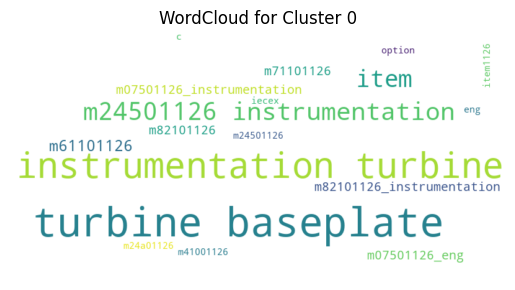

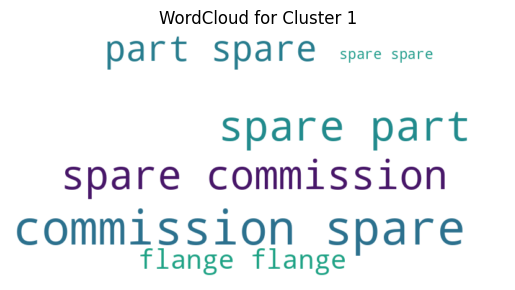

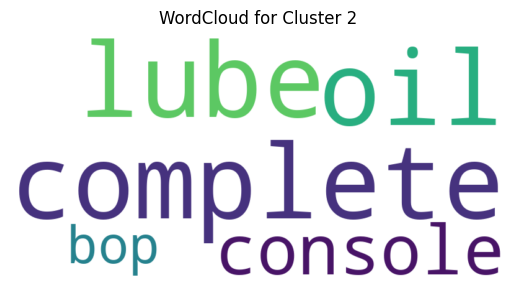

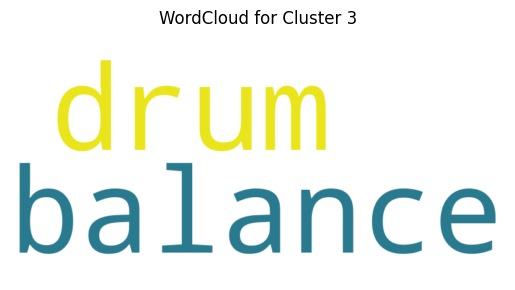

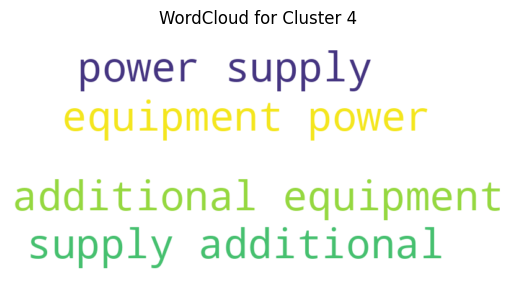

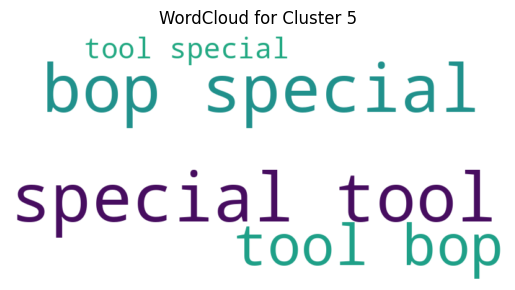

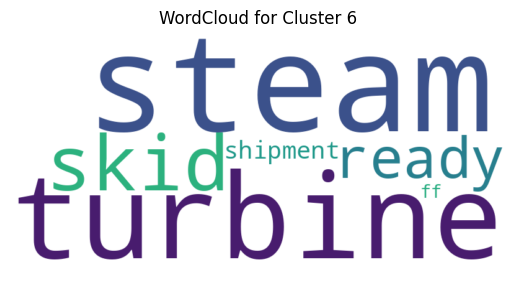

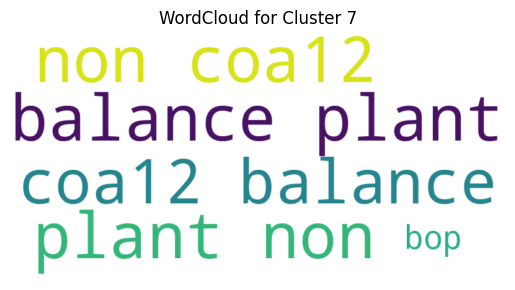

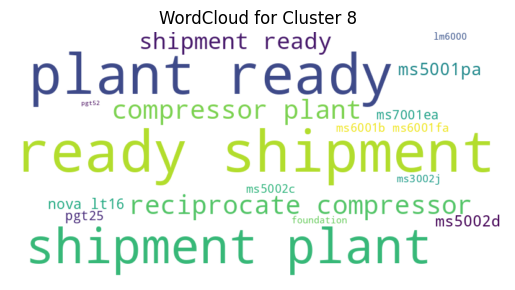

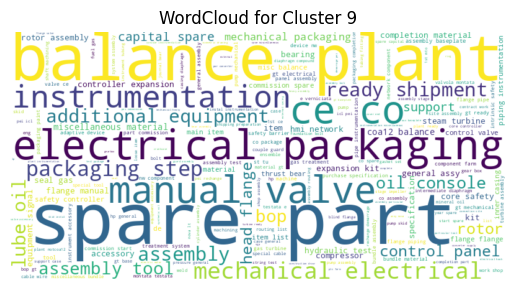

In [43]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2, 2))
tfidf_matrix = vectorizer.fit_transform(df['IMPACTED ITEM DESCRIPTION_preprocessed'])

# Step 3: Apply K-Means clustering
n_clusters = 10  # You can experiment with different numbers
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Step 4: Analyze clusters
# Display top words per cluster
centroids = kmeans.cluster_centers_
terms = vectorizer.get_feature_names_out()
for i in range(n_clusters):
    cluster_terms = [terms[ind] for ind in centroids[i].argsort()[-5:]]  # Top 5 terms
    print(f"Cluster {i}: {', '.join(cluster_terms)}")

# Step 5: Visualize clusters with WordClouds
for cluster in range(n_clusters):
    cluster_text = " ".join(df[df['Cluster'] == cluster]['IMPACTED ITEM DESCRIPTION_preprocessed'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure()
    plt.title(f"WordCloud for Cluster {cluster}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [44]:
# prompt: get total rows from each cluster

print(df['Cluster'].value_counts())

Cluster
9    8401
8     319
1     162
7     124
4      75
5      52
0      33
3       6
6       4
2       2
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# prompt: take a string input and check it belongs to which cluster

def get_cluster_for_string(input_string):
    """
    Predicts the cluster for a given input string based on the trained KMeans model.
    """
    try:
        # Preprocess the input string (same preprocessing as used for training data)
        preprocessed_string = input_string.lower()

        # Transform the preprocessed string using the same vectorizer
        new_vec = vectorizer.transform([preprocessed_string])

        # Predict the cluster
        predicted_cluster = kmeans.predict(new_vec)[0]

        return predicted_cluster
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


# Example usage
input_string = input("Enter a string: ")
cluster = get_cluster_for_string(input_string)

if cluster is not None:
    print(f"The string belongs to cluster: {cluster}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter a string: bom shaft changes
The string belongs to cluster: 9


In [37]:
for cluster_num in range(n_clusters):
    print(f"\n--- Cluster {cluster_num} ---\n")
    cluster_rows = df[df['Cluster'] == cluster_num][['IMPACTED ITEM DESCRIPTION_preprocessed', 'Cluster']].head(5)
    print(cluster_rows)


--- Cluster 0 ---

  IMPACTED ITEM DESCRIPTION_preprocessed  Cluster
0                  piping valve run tank        0
1                test cylinder 2nd stage        0
2                           plc material        0
3               ball valve specification        0
4                       hydraulic device        0

--- Cluster 1 ---

    IMPACTED ITEM DESCRIPTION_preprocessed  Cluster
13                      capital spare part        1
61                       2 year spare part        1
62                   commission spare part        1
109                     capital spare part        1
120          capital spare part fir supply        1

--- Cluster 2 ---

   IMPACTED ITEM DESCRIPTION_preprocessed  Cluster
12                   ff gt ready shipment        2
16                  bop gt ready shipment        2
19                  bop gt ready shipment        2
41                   ff gt ready shipment        2
48                   plant ready shipment        2

--- Cluster 3 ---

  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
from collections import Counter

# Get the terms for each cluster
for cluster_num in range(n_clusters):
    cluster_text = " ".join(df[df['Cluster'] == cluster_num]['IMPACTED ITEM DESCRIPTION_preprocessed'])
    word_counts = Counter(cluster_text.split())
    most_common_words = word_counts.most_common(10)  # Top 10 words
    print(f"Most common words in Cluster {cluster_num}: {most_common_words}")


Most common words in Cluster 0: [('instrumentation', 375), ('material', 305), ('valve', 236), ('test', 222), ('gas', 212), ('equipment', 211), ('miscellaneous', 210), ('additional', 208), ('component', 204), ('farm', 195)]
Most common words in Cluster 1: [('spare', 699), ('part', 417), ('commission', 296), ('capital', 100), ('flange', 72), ('pei', 66), ('start', 55), ('ce', 37), ('co', 37), ('1st', 36)]
Most common words in Cluster 2: [('ready', 445), ('shipment', 445), ('plant', 312), ('gt', 51), ('steam', 31), ('turbine', 31), ('bop', 28), ('reciprocate', 24), ('compressor', 24), ('ff', 18)]
Most common words in Cluster 3: [('balance', 428), ('plant', 413), ('coa12', 239), ('non', 130), ('misc', 67), ('notcoa12', 33), ('bop', 31), ('string', 17), ('test', 17), ('plantnon', 13)]
Most common words in Cluster 4: [('oil', 231), ('lube', 127), ('console', 111), ('instrumentation', 45), ('mineral', 44), ('valve', 34), ('assembly', 30), ('synthetic', 30), ('pump', 22), ('baseplate', 21)]
Mo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


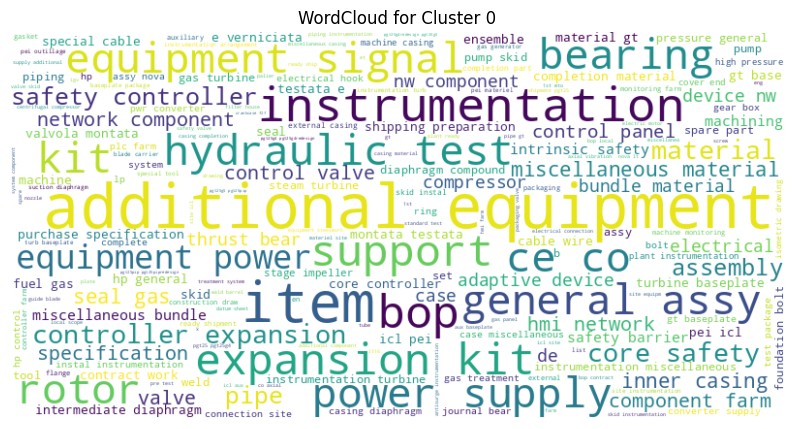

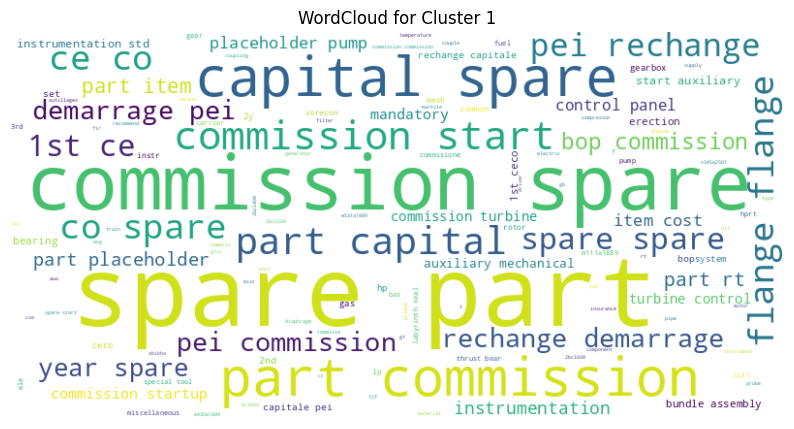

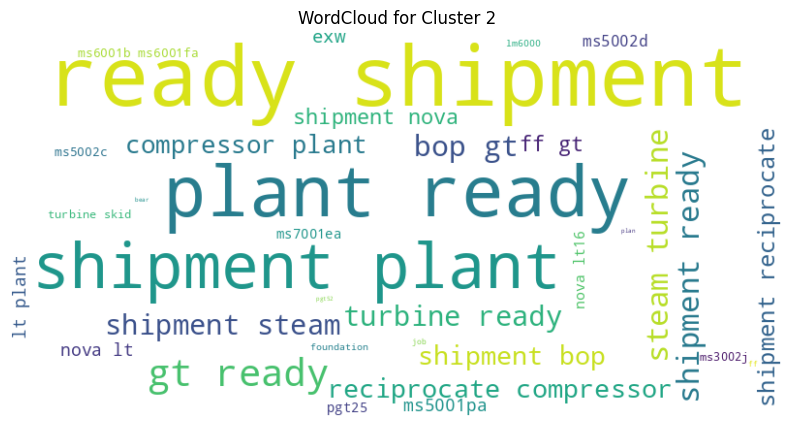

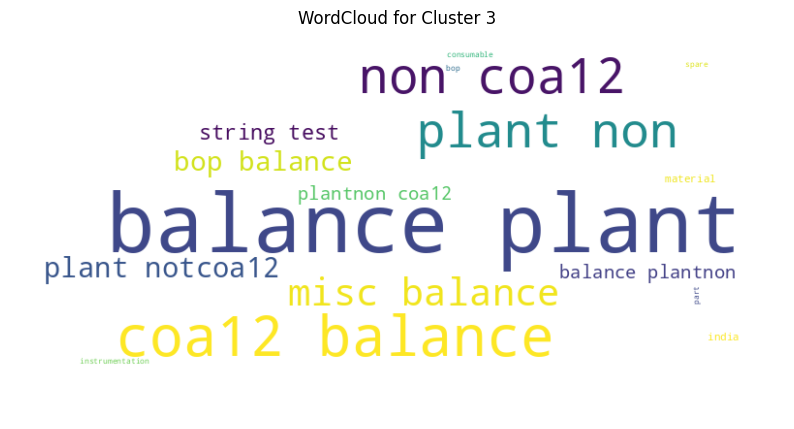

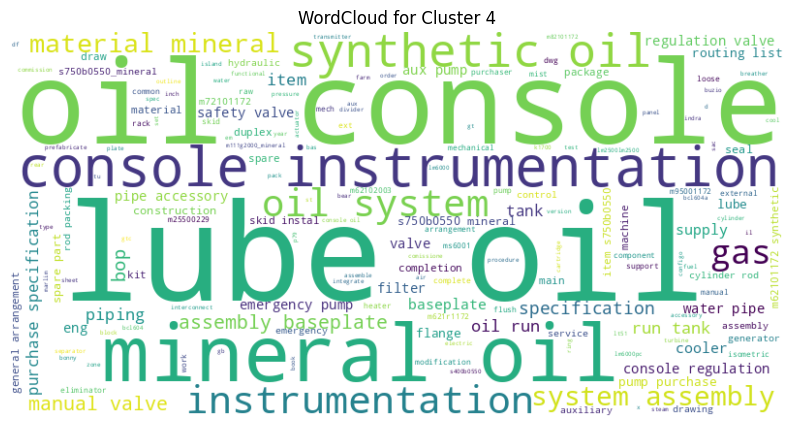

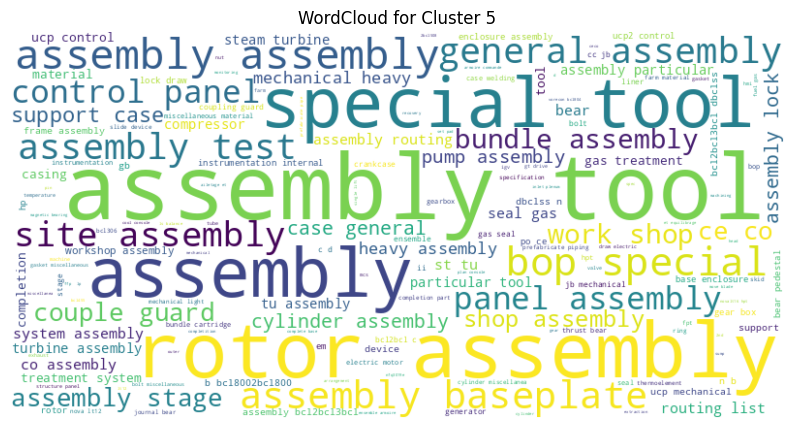

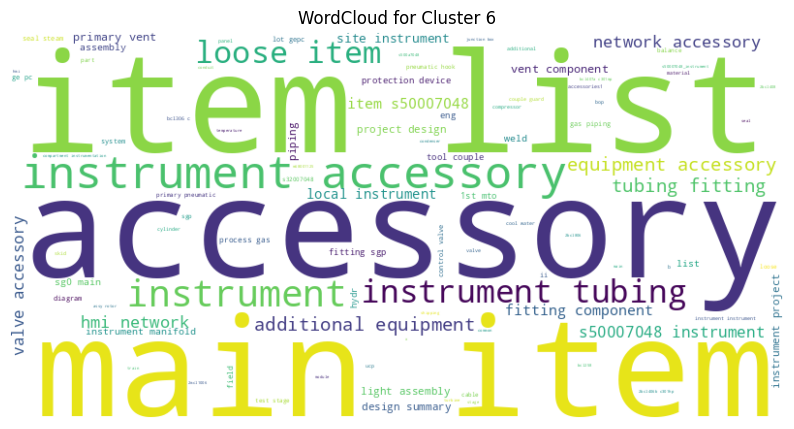

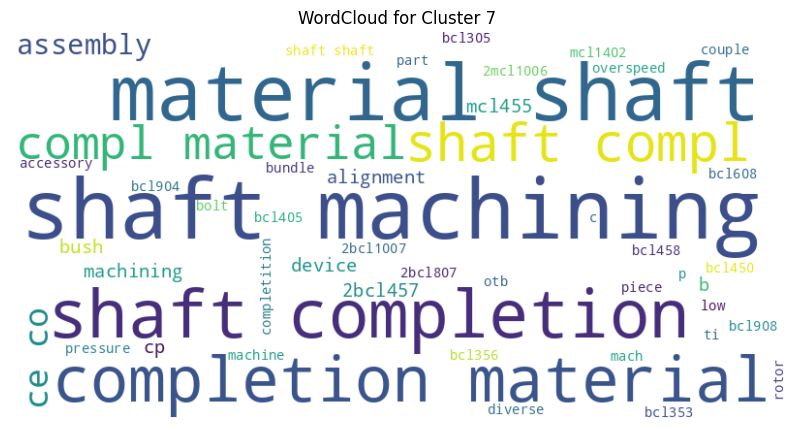

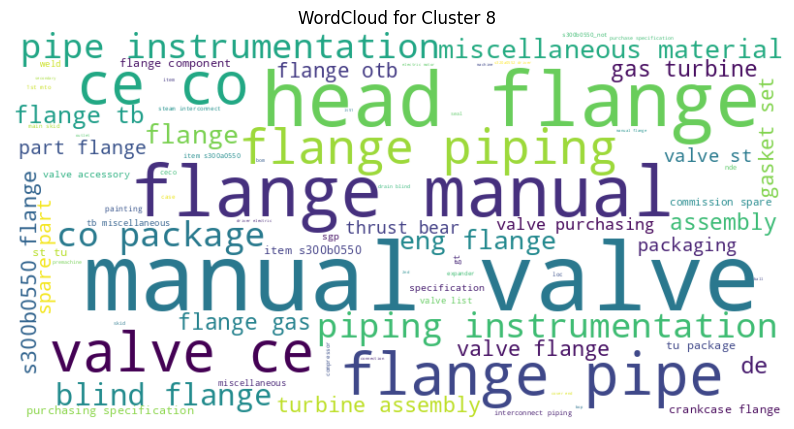

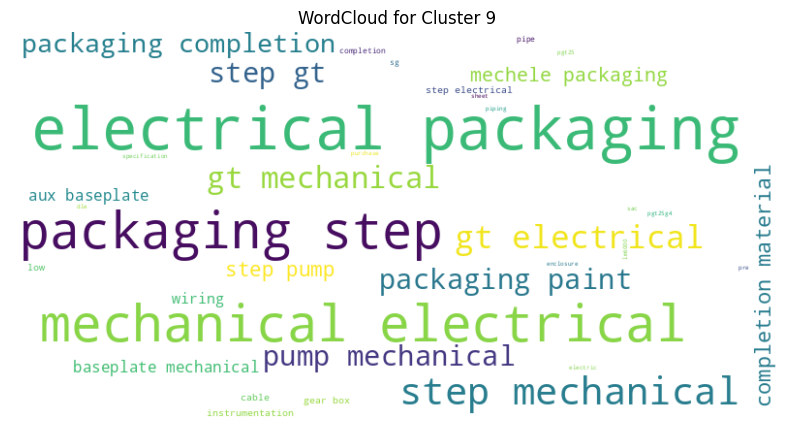

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordClouds for each cluster
for cluster_num in range(n_clusters):
    cluster_text = " ".join(df[df['Cluster'] == cluster_num]['IMPACTED ITEM DESCRIPTION_preprocessed'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Cluster {cluster_num}')
    plt.axis("off")
    plt.show()


##implemetation (cosine simi) (threshold)

In [54]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Advantages** of Using Sentence Transformers

Semantic Understanding: Captures the context of the statement, unlike simple keyword matching.

Better Results: Provides a more accurate measure of similarity, even for paraphrased or contextually related phrases.

Ease of Scaling: Can handle large datasets efficiently with pre-computed embeddings.

In [63]:
def sentenceTransformerModel(col):
  model = SentenceTransformer('all-MiniLM-L6-v2')
  descriptions = df[col].tolist()
  description_embeddings = model.encode(descriptions, convert_to_tensor=True)
  return description_embeddings, model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
col='IMPACTED ITEM DESCRIPTION'
model = SentenceTransformer('all-MiniLM-L6-v2')
descriptions = df[col].tolist()
description_embeddings = model.encode(descriptions, convert_to_tensor=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
def similarityMethod(stmt):
  input_statement = stmt
  input_embedding = model.encode(input_statement, convert_to_tensor=True)
  similarity_scores = util.cos_sim(input_embedding, description_embeddings)[0].cpu().numpy()

  df['similarity_score'] = similarity_scores

  threshold = 0.5
  filtered_results = df[df['similarity_score'] > threshold].sort_values(by='similarity_score', ascending=False)

  print("Top Matches:")
  print(filtered_results[['IMPACTED ITEM DESCRIPTION', 'similarity_score']])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
similarityMethod("auto shift instrumentation ")

Top Matches:
                IMPACTED ITEM DESCRIPTION  similarity_score
8617                      INSTRUMENTATION          0.568749
5712                      INSTRUMENTATION          0.568748
6996                      INSTRUMENTATION          0.568748
7718                      INSTRUMENTATION          0.568748
9043                      INSTRUMENTATION          0.568748
491                 FRAME INSTRUMENTATION          0.558424
6319                FRAME INSTRUMENTATION          0.558424
7635                FRAME INSTRUMENTATION          0.558424
1756                FRAME INSTRUMENTATION          0.558424
1200                FRAME INSTRUMENTATION          0.558424
8981                FRAME INSTRUMENTATION          0.558424
8748    General Assy with instrumentation          0.557880
2383        FRAME INSTRUMENTATION TRAIN A          0.526578
161         FRAME INSTRUMENTATION TRAIN A          0.526578
5232                 SKID INSTRUMENTATION          0.522703
5307                 SKID I

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: def similarityMethod(col,stmt):
#   input_statement = stmt
#   input_embedding = sentenceTransformerModel(col).model.encode(input_statement, convert_to_tensor=True)
#   similarity_scores = util.cos_sim(input_embedding, sentenceTransformerModel(col).description_embeddings)[0].cpu().numpy()
#   df['similarity_score'] = similarity_scores
#   threshold = 0.5
#   filtered_results = df[df['similarity_score'] > threshold].sort_values(by='similarity_score', ascending=False)
#   print("Top Matches:")
#   print(filtered_results[['IMPACTED ITEM DESCRIPTION', 'similarity_score']])
# def sentenceTransformerModel(col):
#   model = SentenceTransformer('all-MiniLM-L6-v2')
#   descriptions = df[col].tolist()
#   description_embeddings = model.encode(descriptions, convert_to_tensor=True)
#   return description_embeddings, model
# is this code correct

import pandas as pd
from sentence_transformers import SentenceTransformer, util

def sentenceTransformerModel(col):
  model = SentenceTransformer('all-MiniLM-L6-v2')
  descriptions = df[col].tolist()
  description_embeddings = model.encode(descriptions, convert_to_tensor=True)
  return {"description_embeddings": description_embeddings, "model": model}

def similarityMethod(col, stmt):
  try:
    input_statement = stmt
    model_data = sentenceTransformerModel(col)
    input_embedding = model_data["model"].encode(input_statement, convert_to_tensor=True)
    similarity_scores = util.cos_sim(input_embedding, model_data["description_embeddings"])[0].cpu().numpy()
    df['similarity_score'] = similarity_scores
    threshold = 0.5
    filtered_results = df[df['similarity_score'] > threshold].sort_values(by='similarity_score', ascending=False)
    print("Top Matches:")
    print(filtered_results[['IMPACTED ITEM DESCRIPTION', 'similarity_score']])
  except KeyError as e:
    print(f"Error: Column '{col}' not found in DataFrame. Please check the column name.")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Example usage (assuming 'df' is defined and contains the 'IMPACTED ITEM DESCRIPTION' column)
# similarityMethod('IMPACTED ITEM DESCRIPTION', "valves")